# Data Dictionary 

#### 1. Trip_ID: Unique identifier for each trip
#### 2. Mode_of_Transport: Type of transport used: Bus, Train, Ferry, or Tram (includes inconsistencies)
#### 3. Departure_Station: Station where the trip starts (contains whitespace errors)
#### 4. Arrival_Station: Station where the trip ends (inconsistent casing)
#### 5. Departure_Time: Exact date and time when the trip departed
#### 6. Passenger_Count: Number of passengers on the trip (includes missing values)
#### 7. Fare_Amount: Amount paid by the passengers for the trip (includes missing values)
#### 8. Trip_Duration_Minutes: Duration of the trip in minutes (includes missing values)
#### 9. Trip_Date: Date on which the trip occurred
#### 10. Day_of_Week: Day of the week on which the trip occurred

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load dataset

In [2]:
data = pd.read_excel("Public_Transport_Trips_EDA.xlsx")

In [3]:
data.head()

,Trip_ID,Mode_of_Transport,Departure_Station,Arrival_Station,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Day_of_Week,Unnamed: 10,Unnamed: 11
0,TRIP0001,FERRY,West End,airport,2024-01-01 06:00:00,21.0,4.343642,26.0,2024-01-01,Sunday,NaN,F
1,TRIP0002,Tram,North Station,Downtown,2024-01-01 06:01:00,46.0,20.673380,134.0,2024-01-01,Saturday,NaN,F
2,TRIP0003,bus,Central,North Station,2024-01-01 06:02:00,91.0,NaN,NaN,2024-01-01,Tuesday,NaN,F
3,TRIP0004,FERRY,Downtown,Central,2024-01-01 06:03:00,27.0,3.767487,NaN,2024-01-01,Sunday,NaN,F
4,TRIP0005,Ferry,Downtown,Central,2024-01-01 06:04:00,66.0,NaN,NaN,2024-01-01,Monday,NaN,F


In [4]:
data[50:]

,Trip_ID,Mode_of_Transport,Departure_Station,Arrival_Station,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Day_of_Week,Unnamed: 10,Unnamed: 11
50,TRIP0051,bus,South Point,Airport,2024-01-01 06:50:00,14.0,13.934764,66.0,2024-01-03,Saturday,NaN,F
51,TRIP0052,Ferry,West End,West End,2024-01-01 06:51:00,3.0,25.086423,145.0,2024-01-03,Friday,NaN,T
52,TRIP0053,FERRY,Airport,Airport,2024-01-01 06:52:00,88.0,14.571568,113.0,2024-01-03,Thursday,NaN,T
53,TRIP0054,bus,West End,Airport,2024-01-01 06:53:00,80.0,NaN,85.0,2024-01-03,Sunday,NaN,F
54,TRIP0055,Bus,Central,North Station,2024-01-01 06:54:00,58.0,31.663106,NaN,2024-01-03,Friday,NaN,F
...,...,...,...,...,...,...,...,...,...,...,...,...
995,TRIP0996,train,North Station,West End,2024-01-01 22:35:00,NaN,40.546670,51.0,2024-02-11,Saturday,NaN,NaN
996,TRIP0997,Bus,Central,West End,2024-01-01 22:36:00,63.0,7.772635,35.0,2024-02-11,Thursday,NaN,NaN
997,TRIP0998,FERRY,West End,North Station,2024-01-01 22:37:00,23.0,NaN,8.0,2024-02-11,Saturday,NaN,NaN
998,TRIP0999,Tram,South Point,Central,2024-01-01 22:38:00,9.0,43.300617,169.0,2024-02-11,Sunday,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Trip_ID                1000 non-null   object        
 1   Mode_of_Transport      1000 non-null   object        
 2   Departure_Station      1000 non-null   object        
 3   Arrival_Station        1000 non-null   object        
 4   Departure_Time         1000 non-null   datetime64[ns]
 5   Passenger_Count        900 non-null    float64       
 6   Fare_Amount            900 non-null    float64       
 7   Trip_Duration_Minutes  900 non-null    float64       
 8   Trip_Date              1000 non-null   datetime64[ns]
 9   Day_of_Week            1000 non-null   object        
 10  Unnamed: 10            0 non-null      float64       
 11  Unnamed: 11            299 non-null    object        
dtypes: datetime64[ns](2), float64(4), object(6)
memory usage: 93.9+

#### Drop unknow column (irrelevaant)

In [6]:
data.drop(["Unnamed: 10", "Unnamed: 11"], axis=1, inplace=True)

In [7]:
data.columns

Index(['Trip_ID', 'Mode_of_Transport', 'Departure_Station', 'Arrival_Station',
       'Departure_Time', 'Passenger_Count', 'Fare_Amount',
       'Trip_Duration_Minutes', 'Trip_Date', 'Day_of_Week'],
      dtype='object')

In [8]:
# Convert categorical columns to title case (proper case)
for col in data.select_dtypes(include="object").columns:
    data[col] = data[col].str.title()

In [9]:
# Get unique values from categorical column
unique_mode_trans = data["Mode_of_Transport"].unique()
unique_deprt_stn = data["Departure_Station"].unique()
unique_arr_stn = data["Arrival_Station"].unique()
unique_day_wk = data["Day_of_Week"].unique()

print(f"Mode_of_Transport: {unique_mode_trans}")
print(f"Departure_Station: {unique_deprt_stn}")
print(f"Arrival_Station: {unique_arr_stn}")
print(f"Day_of_Week: {unique_day_wk}")

Mode_of_Transport: ['Ferry' 'Tram' 'Bus' 'Train']
Departure_Station: ['West End' 'North Station' 'Central' 'Downtown' 'South Point' ' Central '
 'Airport']
Arrival_Station: ['Airport' 'Downtown' 'North Station' 'Central' 'South Point' 'West End']
Day_of_Week: ['Sunday' 'Saturday' 'Tuesday' 'Monday' 'Thursday' 'Wednesday' 'Friday']


#### Handling missing number

In [10]:
data.describe()

,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date
count,1000,900.000000,900.000000,900.000000,1000
mean,2024-01-01 14:19:30,49.154444,25.360742,94.270000,2024-01-21 08:03:50.400000
min,2024-01-01 06:00:00,1.000000,0.500576,5.000000,2024-01-01 00:00:00
25%,2024-01-01 10:09:45,25.000000,12.818196,49.750000,2024-01-11 00:00:00
50%,2024-01-01 14:19:30,48.000000,25.403856,97.500000,2024-01-21 00:00:00
75%,2024-01-01 18:29:15,72.000000,37.866623,138.000000,2024-02-01 00:00:00
max,2024-01-01 22:39:00,99.000000,49.945184,179.000000,2024-02-11 00:00:00
std,NaN,27.698270,14.464556,50.634982,NaN


In [11]:
data.isnull().sum()

Trip_ID                    0
Mode_of_Transport          0
Departure_Station          0
Arrival_Station            0
Departure_Time             0
Passenger_Count          100
Fare_Amount              100
Trip_Duration_Minutes    100
Trip_Date                  0
Day_of_Week                0
dtype: int64

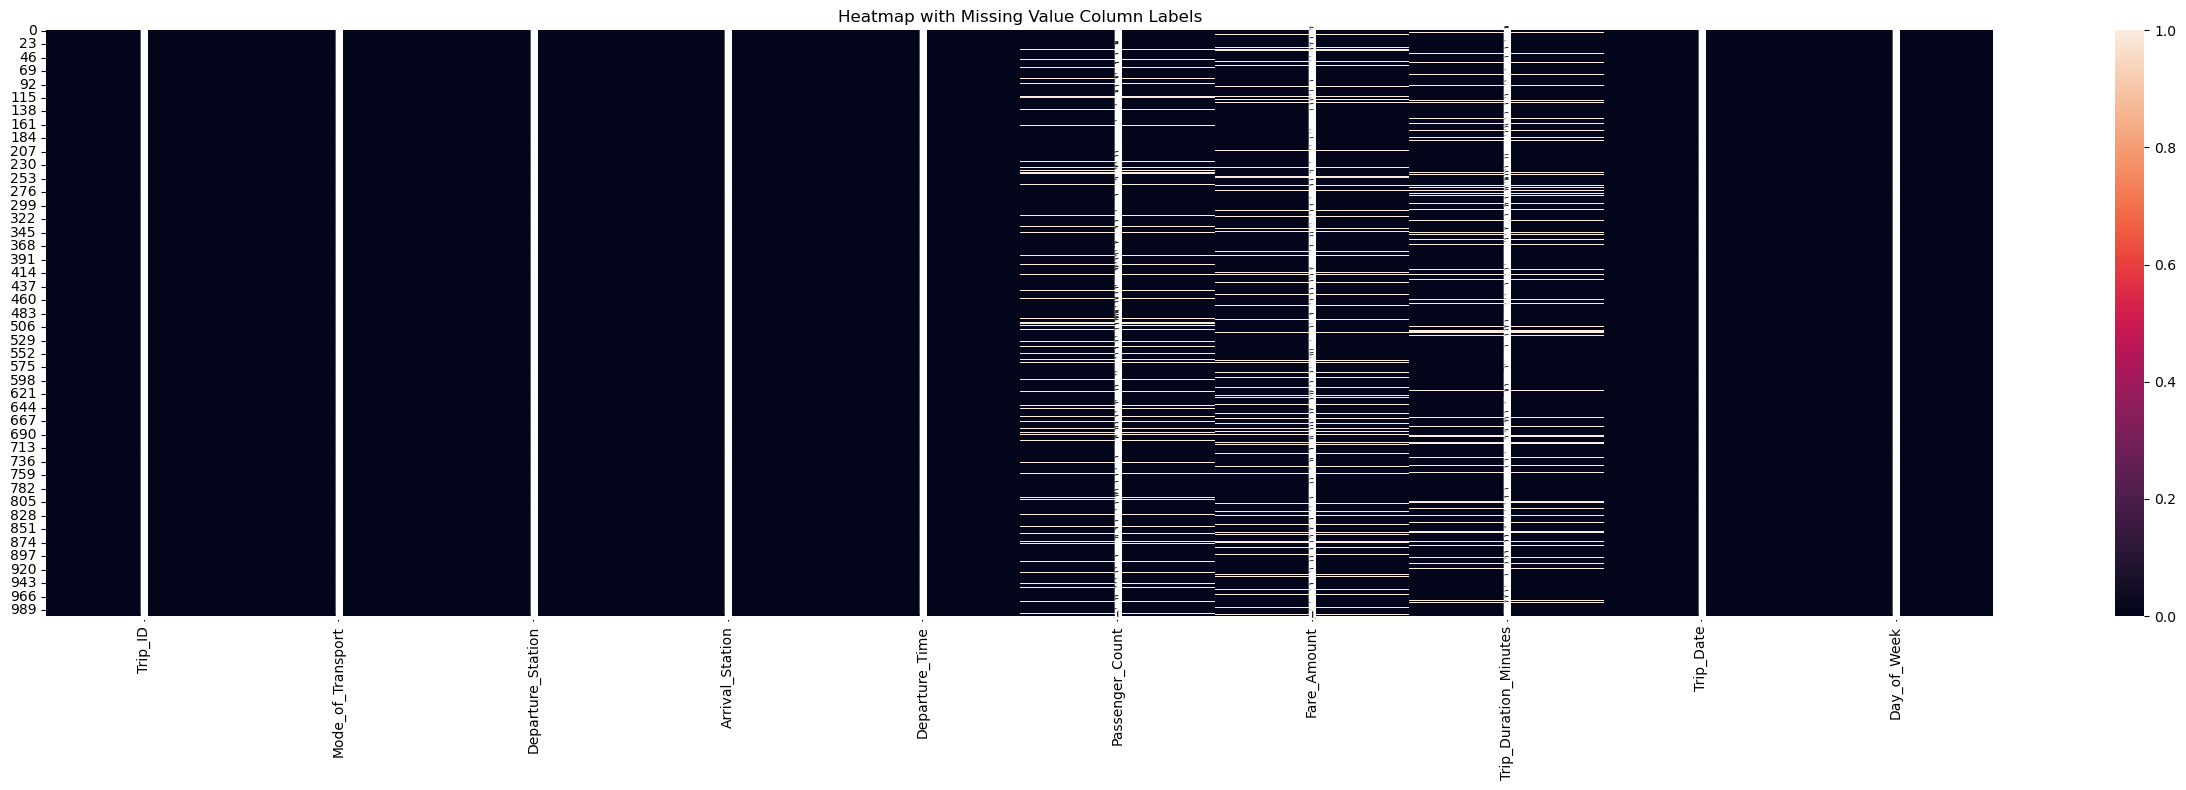

In [12]:
plt.figure(figsize=(25,8))
sns.heatmap(data.isnull(), annot=True)
plt.title("Heatmap with Missing Value Column Labels")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [13]:
import missingno as msno  # Missing data - Data visualisation

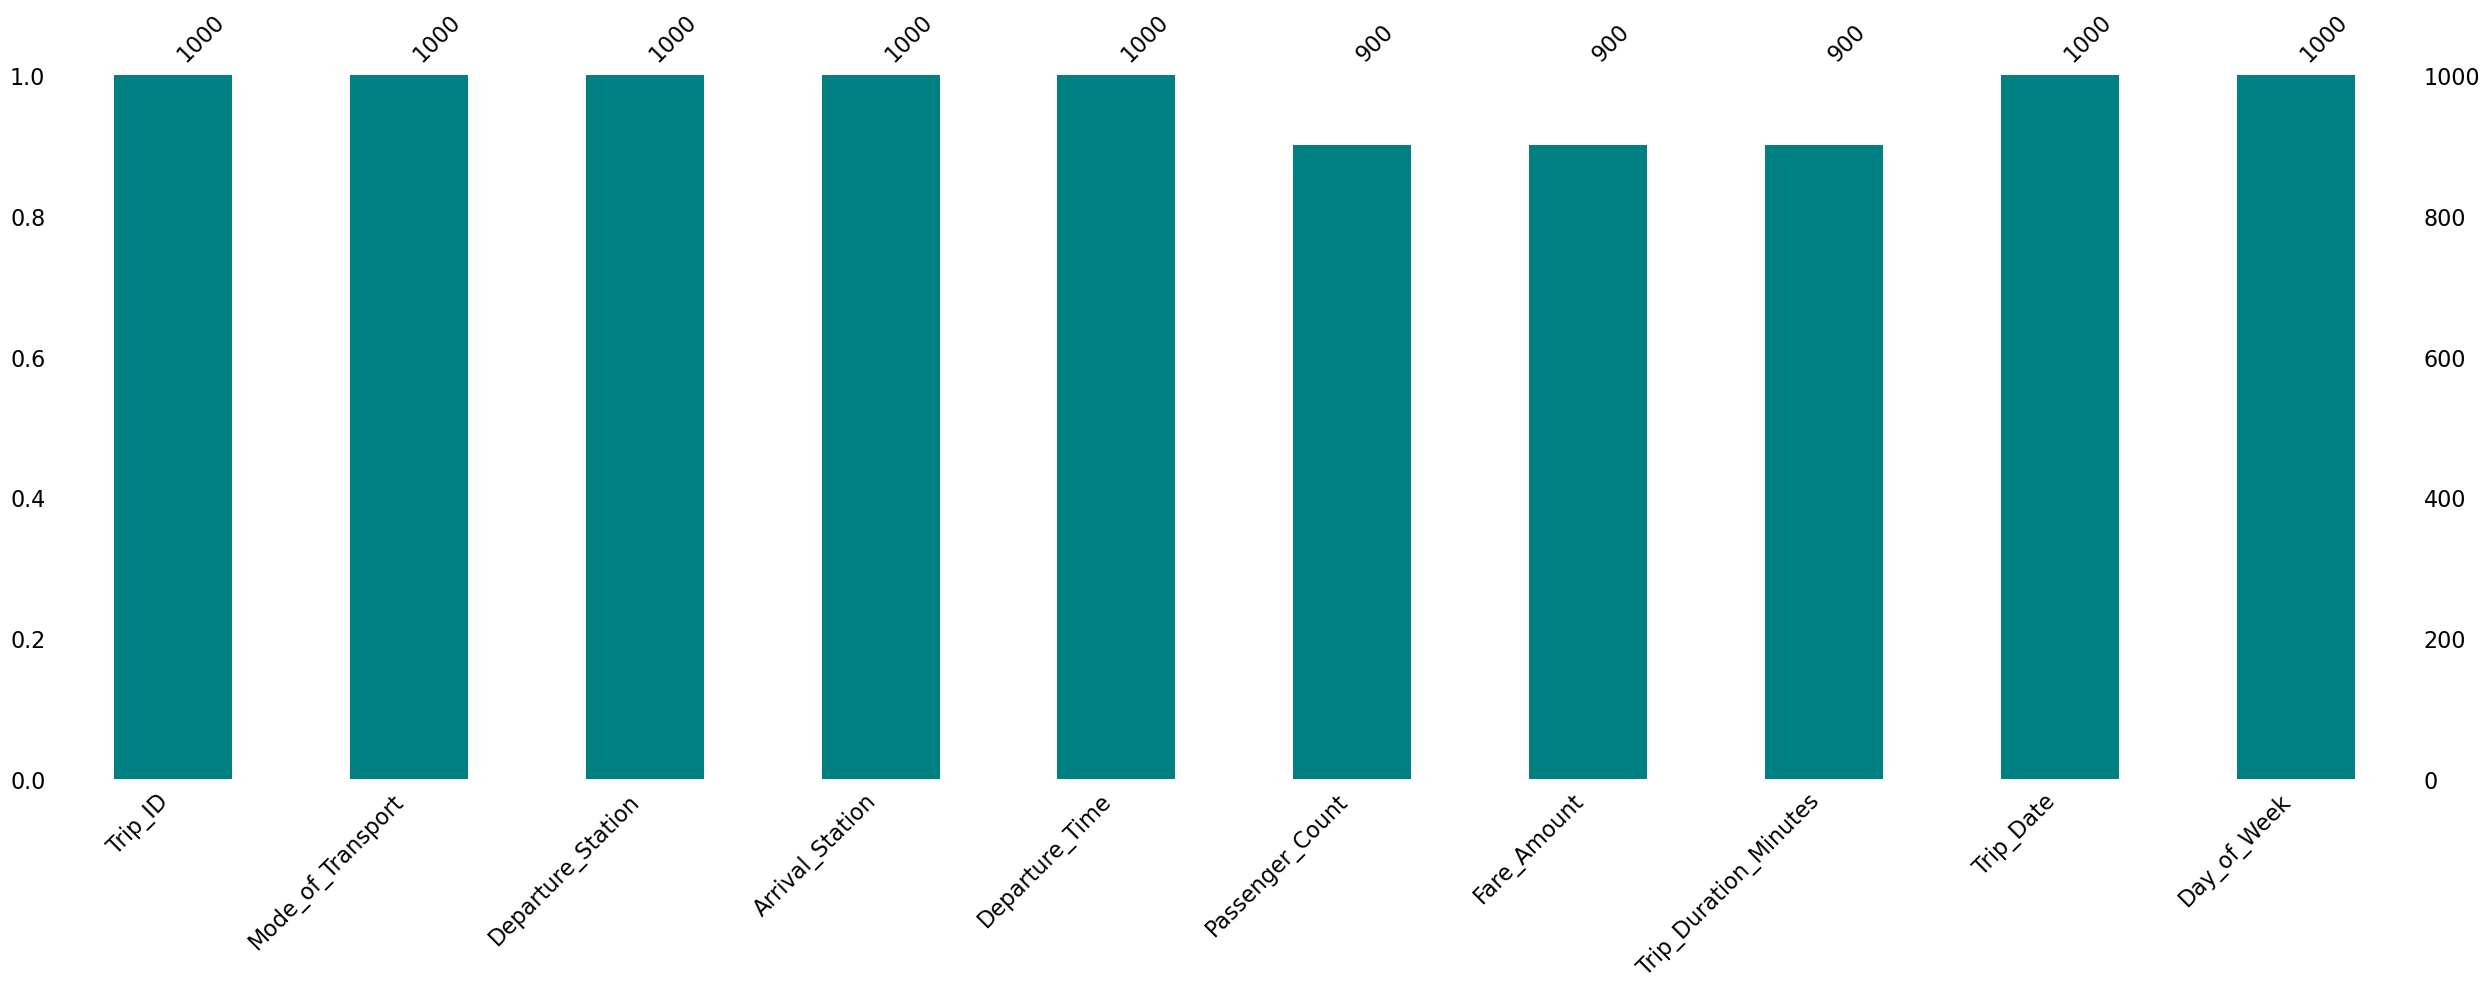

In [14]:
plt.figure(figsize=(25,8))
msno.bar(data, color="teal")
plt.tight_layout()

In [15]:
# fill missing values with median
data["Passenger_Count"].fillna(data["Passenger_Count"].median(), inplace=True)
data["Fare_Amount"].fillna(data["Fare_Amount"].median(), inplace=True)
data["Trip_Duration_Minutes"].fillna(data["Trip_Duration_Minutes"].median(), inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_13924\2583402820.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Passenger_Count"].fillna(data["Passenger_Count"].median(), inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_13924\2583402820.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

In [16]:
data.isnull().sum()

Trip_ID                  0
Mode_of_Transport        0
Departure_Station        0
Arrival_Station          0
Departure_Time           0
Passenger_Count          0
Fare_Amount              0
Trip_Duration_Minutes    0
Trip_Date                0
Day_of_Week              0
dtype: int64

In [17]:
data.duplicated().sum()

np.int64(0)

In [18]:
data.drop(["Trip_ID"], axis=1, inplace=True)	

In [19]:
data["Trip_Date"].min()

Timestamp('2024-01-01 00:00:00')

In [20]:
data["Trip_Date"].max()

Timestamp('2024-02-11 00:00:00')

In [21]:
# Extract the Year, Month, Quarter
data['Date'] = pd.to_datetime(data['Trip_Date'])
data["month"] = data["Trip_Date"].dt.month
data["month_name"] = data["Trip_Date"].dt.month_name()

data.head(3)

,Mode_of_Transport,Departure_Station,Arrival_Station,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Day_of_Week,Date,month,month_name
0,Ferry,West End,Airport,2024-01-01 06:00:00,21.0,4.343642,26.0,2024-01-01,Sunday,2024-01-01,1,January
1,Tram,North Station,Downtown,2024-01-01 06:01:00,46.0,20.673380,134.0,2024-01-01,Saturday,2024-01-01,1,January
2,Bus,Central,North Station,2024-01-01 06:02:00,91.0,25.403856,97.5,2024-01-01,Tuesday,2024-01-01,1,January


# Handling outliers & Univariate analysis on numerical variables

In [22]:
numerica_columns = data.select_dtypes(include="number")

In [23]:
numerica_columns.head(3)

,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,month
0,21.0,4.343642,26.0,1
1,46.0,20.673380,134.0,1
2,91.0,25.403856,97.5,1


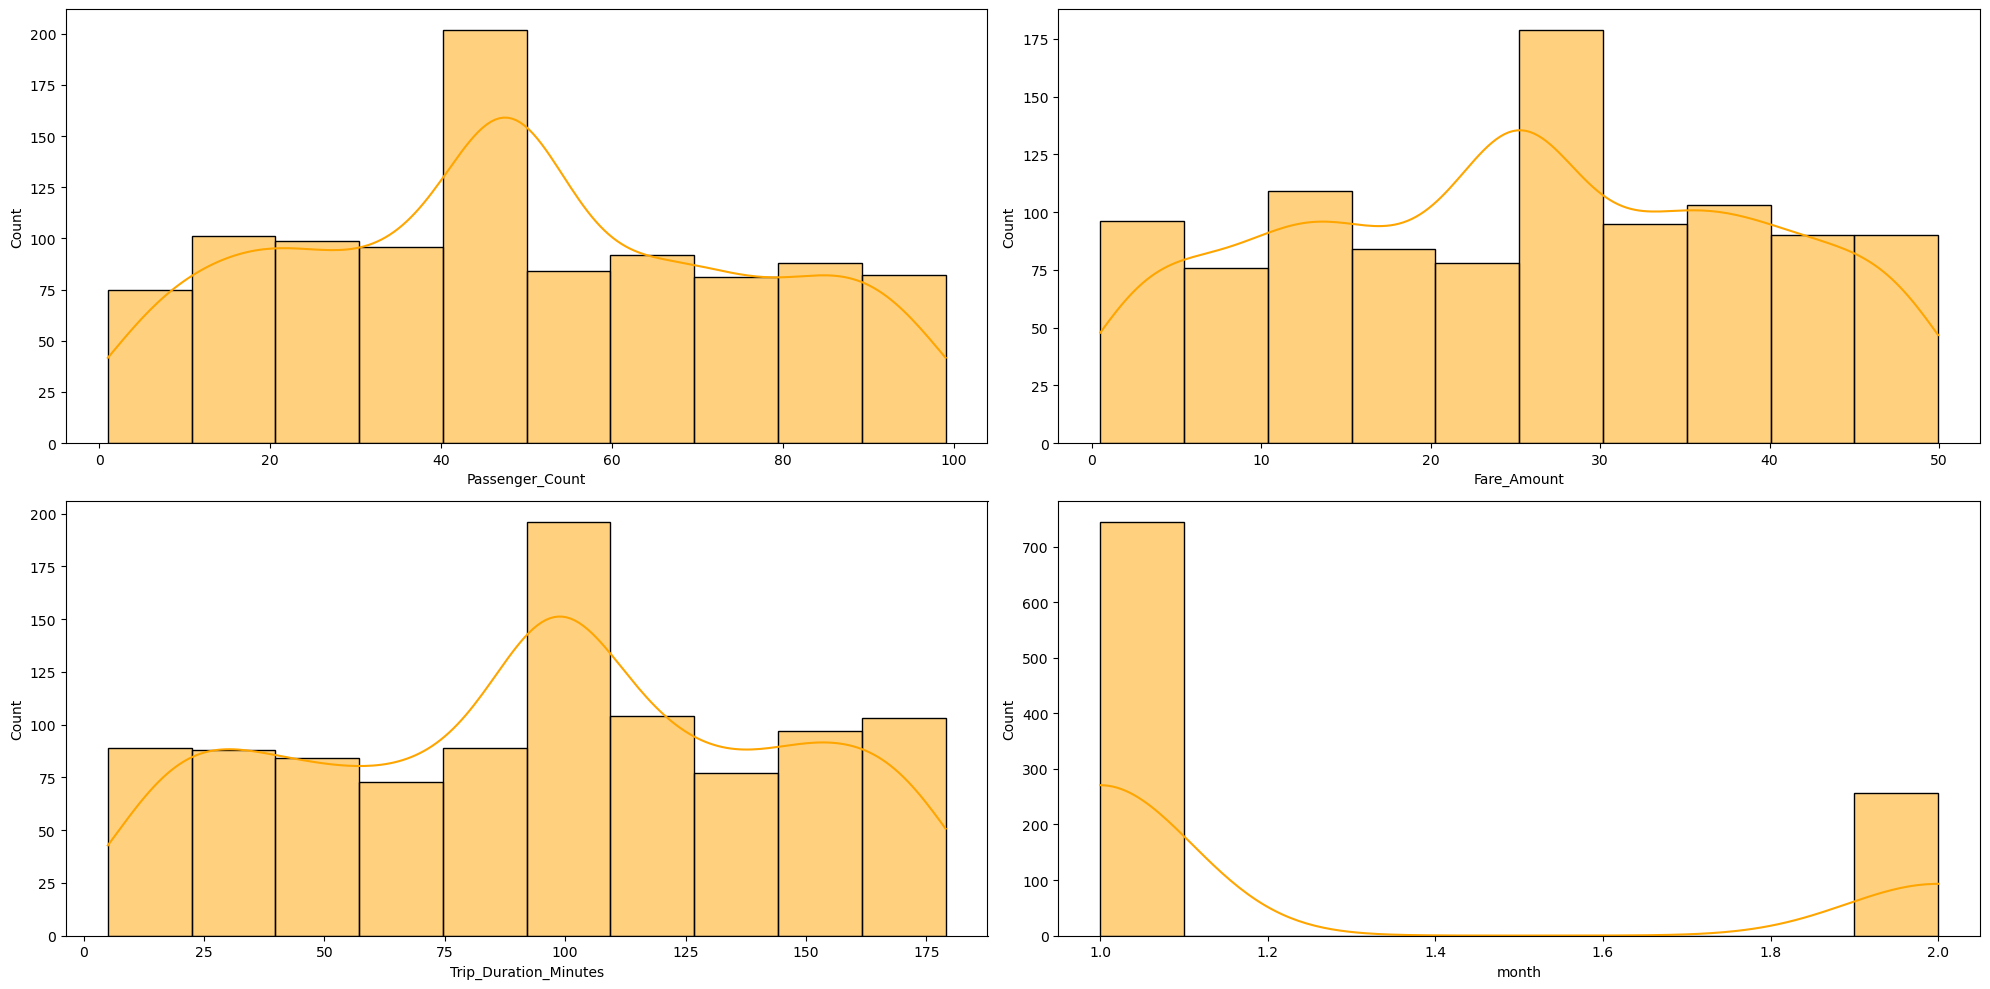

In [24]:
# Use histogram to check outliers
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,10))
ax=ax.flatten()

for index, column_name in enumerate(numerica_columns):
    sns.histplot(data[column_name], color="orange", ax=ax[index], kde=True, bins=10)

plt.tight_layout()
plt.show()

***Insight:*** 1.Passenger_count - Most trips are normally distributed around 45, with most passenger count falling between 25-60, indicating that rides per trip contains slightly same number of passengers. 
***Insight:*** 2.Trip_duration_minutes - are normally distributed around 100 minutes, with most trip duration falling between 25-175 minutes. 
***Insight:*** 3.Fare_Price- most fare amount are normally distributed around 25 USD, with most fares price falling between 10-35 USD. 
***Insight:*** 4.Month- shows most of the activities occured in the month of January. These charts indicating a likelyhood of not having an outliers in the dataset.

In [25]:
data["Passenger_Count"].value_counts().sum()

np.int64(1000)

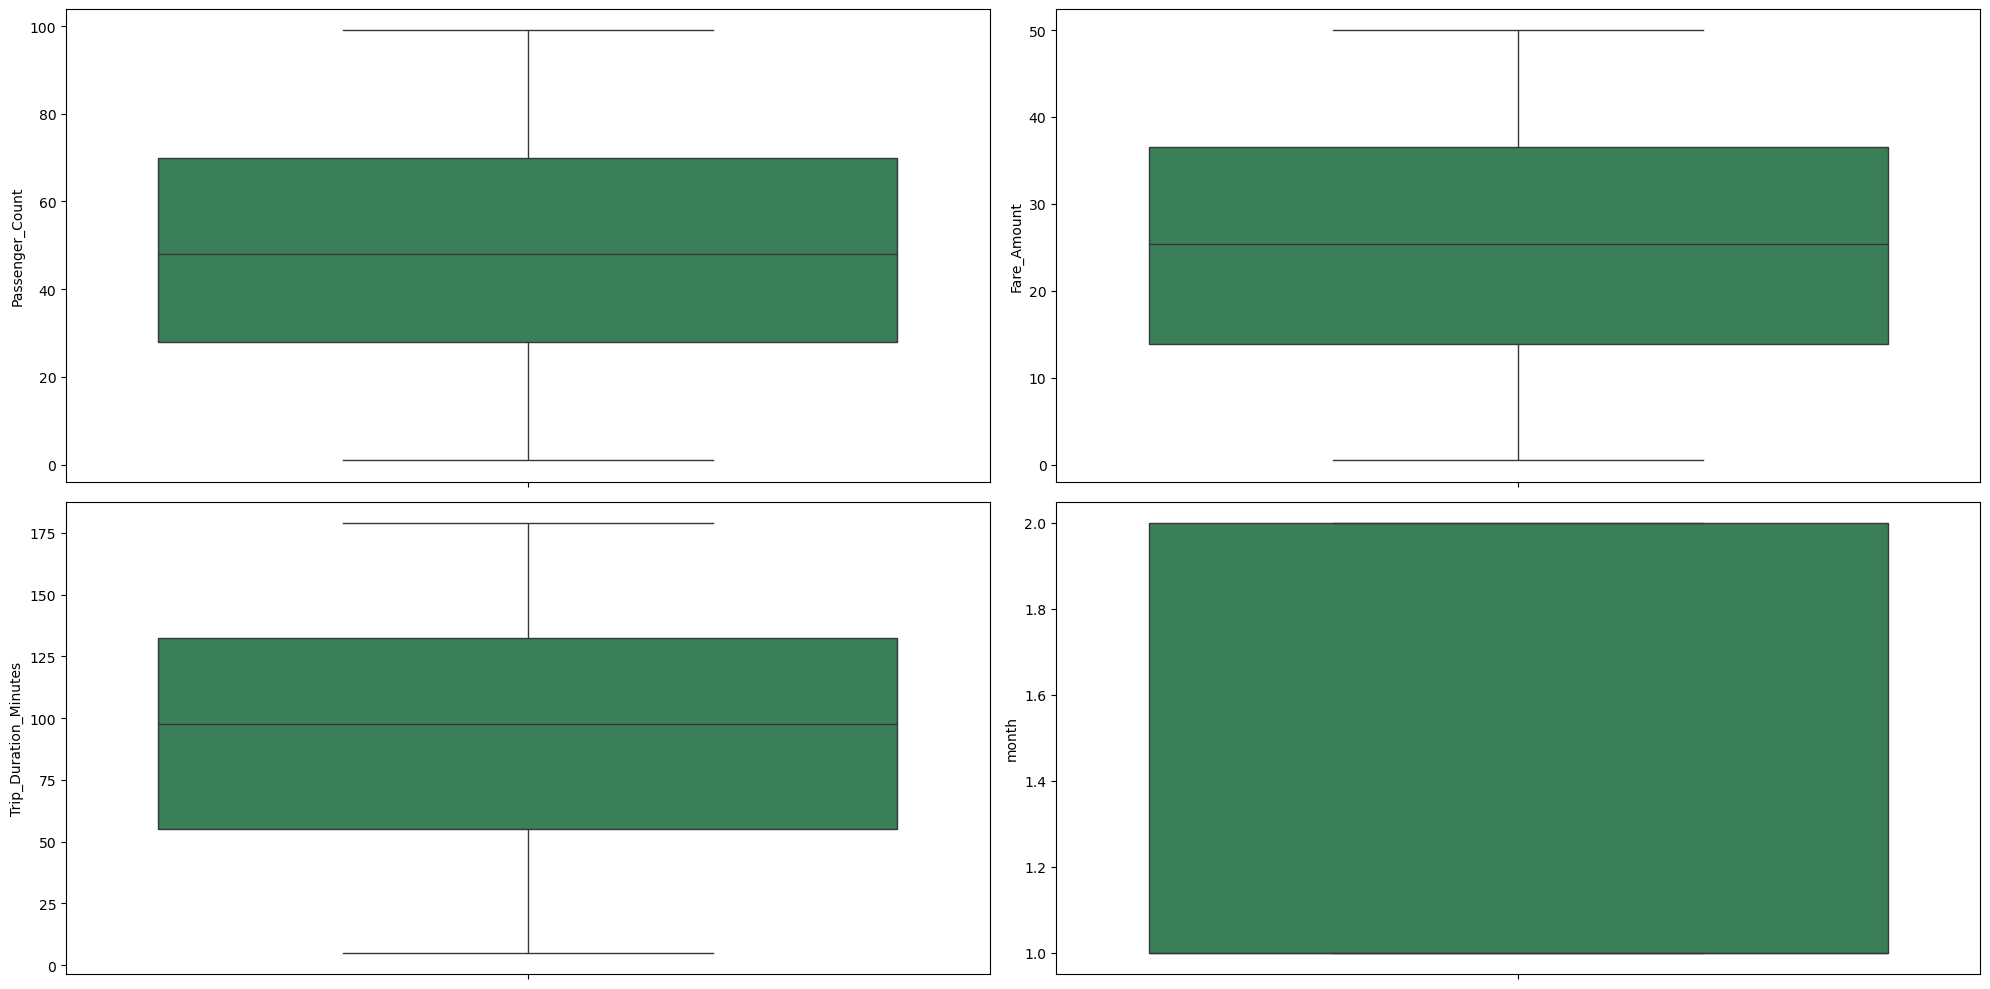

In [26]:
# To further confirm outliers with a boxplot
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,10))
ax=ax.flatten()

for index, column_name in enumerate(numerica_columns):
    sns.boxplot(data[column_name], color="seagreen", ax=ax[index])

plt.tight_layout()
plt.show()

***Insight:*** These charts show that there is no outliers i.e expreme values in the dataset.

### To further confirm outliers no outliers 

In [27]:
affected_col = ["Passenger_Count", "Fare_Amount", "Trip_Duration_Minutes"]

In [28]:
q1 = data[affected_col].quantile(0.25)
q3 = data[affected_col].quantile(0.75)

In [29]:
iqr = q3 - q1

In [30]:
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [31]:
data[affected_col] = data[affected_col].clip(lower=lower_bound, upper=upper_bound, axis=1)

### To further confirm interqartile range, and median values

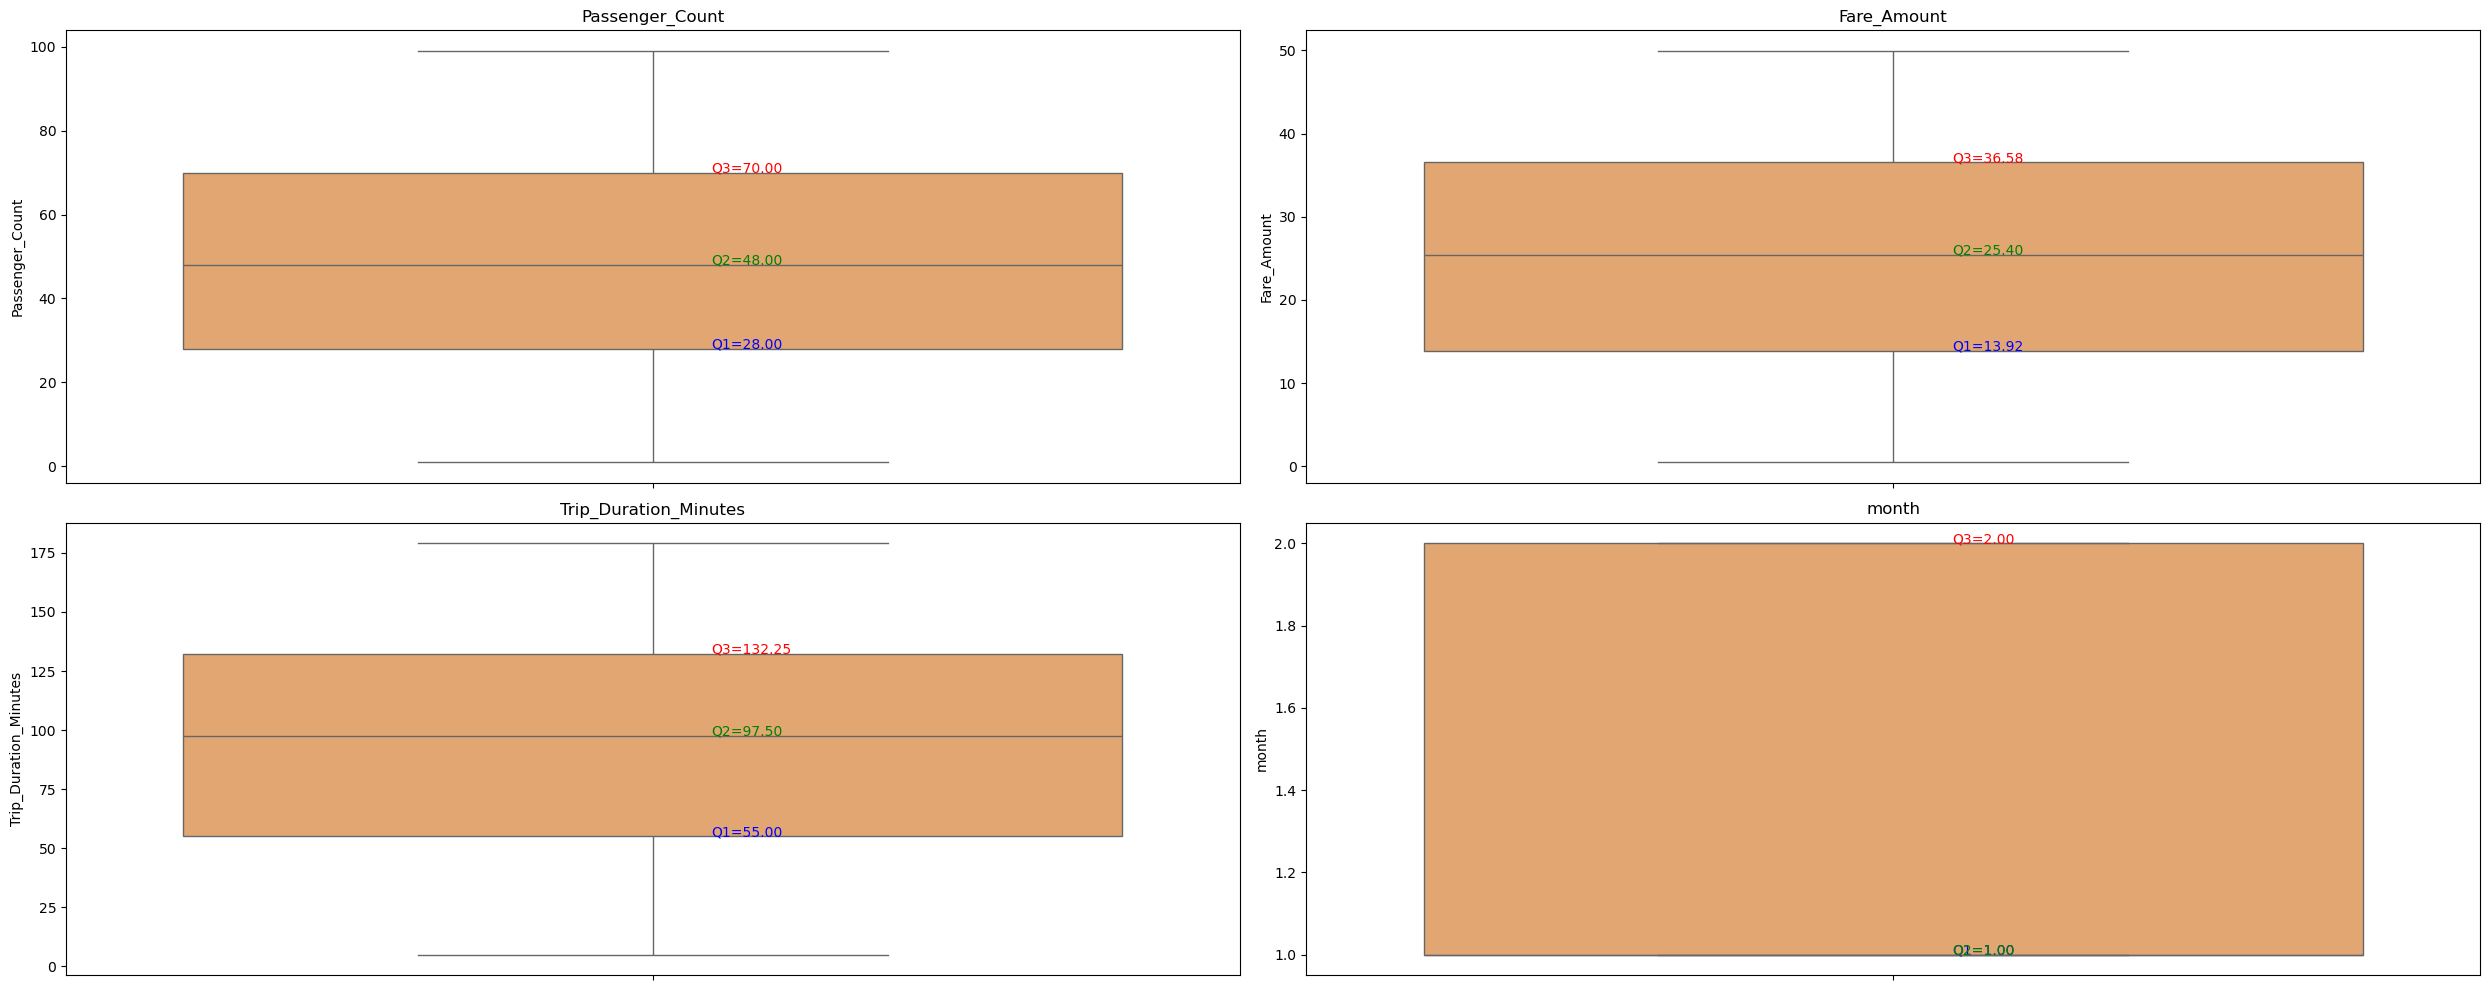

In [32]:
# Create subplots
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,10))
ax=ax.flatten()

for index, column_name in enumerate(numerica_columns):
    sns.boxplot(data[column_name], color="sandybrown", ax=ax[index])
    
    # Compute quartiles
    q1 = data[column_name].quantile(0.25)
    q2 = data[column_name].quantile(0.50)
    q3 = data[column_name].quantile(0.75)
    ax[index].text(0.05, q2, f"Q2={q2:.2f}", color="green")
    
    # Annotate
    ax[index].text(0.05, q1, f"Q1={q1:.2f}", color="blue")
    ax[index].text(0.05, q3, f"Q3={q3:.2f}", color="red")
    
    ax[index].set_title(column_name)

plt.tight_layout()
plt.show()

***Insight:*** 1.Passenger_count - The median pasenger count is around 45, and the Interquartile range (IQR) shows most passenger count fall between 28 and 70. 
***Insight:*** 2.Trip_duration_minutes - The median trip duration is around 100 minutes, and IQR shows most trip duration fall between 55 and 132.25 minutes. 
***Insight:*** 3.Fare_Price- The median fare amounts is around 25, and IQR shows most fare price fall between 13.92 and 36.56. 
***Insight:*** 4.Month- shows most of the activities occured in the month of January. 
***Insight:*** Charts indicate no outliers i.e extremes values

### Remove white space from a feature (departure station)

In [33]:
data["Departure_Station"].unique()

array(['West End', 'North Station', 'Central', 'Downtown', 'South Point',
       ' Central ', 'Airport'], dtype=object)

In [34]:
data["Departure_Station"] = data["Departure_Station"].str.strip()

In [35]:
data["Departure_Station"].unique()

array(['West End', 'North Station', 'Central', 'Downtown', 'South Point',
       'Airport'], dtype=object)

## Descriptive Statistic Analysis of Numerical Features

In [36]:
# Compute Mean 
Fare_Amount_avg = data["Fare_Amount"].mean()
Passenger_Count_avg = data["Passenger_Count"].mean()
Trip_Duration_Minutes_avg = data["Trip_Duration_Minutes"].mean()

# Compute std
Fare_Amount_std = data["Fare_Amount"].std()
Passenger_Count_std = data["Passenger_Count"].std()
Trip_Duration_Minutes_std = data["Trip_Duration_Minutes"].std()

# Compute median
Fare_Amount_median = data["Fare_Amount"].median()
Trip_Duration_Minutes_median = data["Trip_Duration_Minutes"].median()

# Compute IQR
fa_q1 = data["Fare_Amount"].quantile(0.25)
fa_q3 = data["Fare_Amount"].quantile(0.75)
fa_iqr = fa_q3 - fa_q1

tdm_q1 = data["Trip_Duration_Minutes"].quantile(0.25)
tdm_q3 = data["Trip_Duration_Minutes"].quantile(0.75)
tdm_iqr = tdm_q3 - tdm_q1



print("Fare Amount mean:", Fare_Amount_avg)
print("Fare Amount std:", Fare_Amount_std)
print("Fare Amount median:", Fare_Amount_median)
print("Fare Amount IQR:", fa_iqr)


print("Passenger Count mean:", Passenger_Count_avg)
print("Passenger Count std:", Passenger_Count_std)


print("Trip_Duration_Minutes mean:", Trip_Duration_Minutes_avg)
print("Trip_Duration_Minutes std:", Trip_Duration_Minutes_std)
print("Trip_Duration_Minutes median:", Trip_Duration_Minutes_median)
print("Trip_Duration_Minutes IQR:", tdm_iqr)

Fare Amount mean: 25.36505339818716
Fare Amount std: 13.721526066751997
Fare Amount median: 25.403856477451566
Fare Amount IQR: 22.66275736960654
Passenger Count mean: 49.039
Passenger Count std: 26.27770912764272
Trip_Duration_Minutes mean: 94.593
Trip_Duration_Minutes std: 48.04367331444945
Trip_Duration_Minutes median: 97.5
Trip_Duration_Minutes IQR: 77.25


📊 Descriptive Summary:

                            Mean     Median    Std Dev        IQR
Fare_Amount            25.365053  25.403856  13.721526  22.662757
Passenger_Count        49.039000  48.000000  26.277709  42.000000
Trip_Duration_Minutes  94.593000  97.500000  48.043673  77.250000


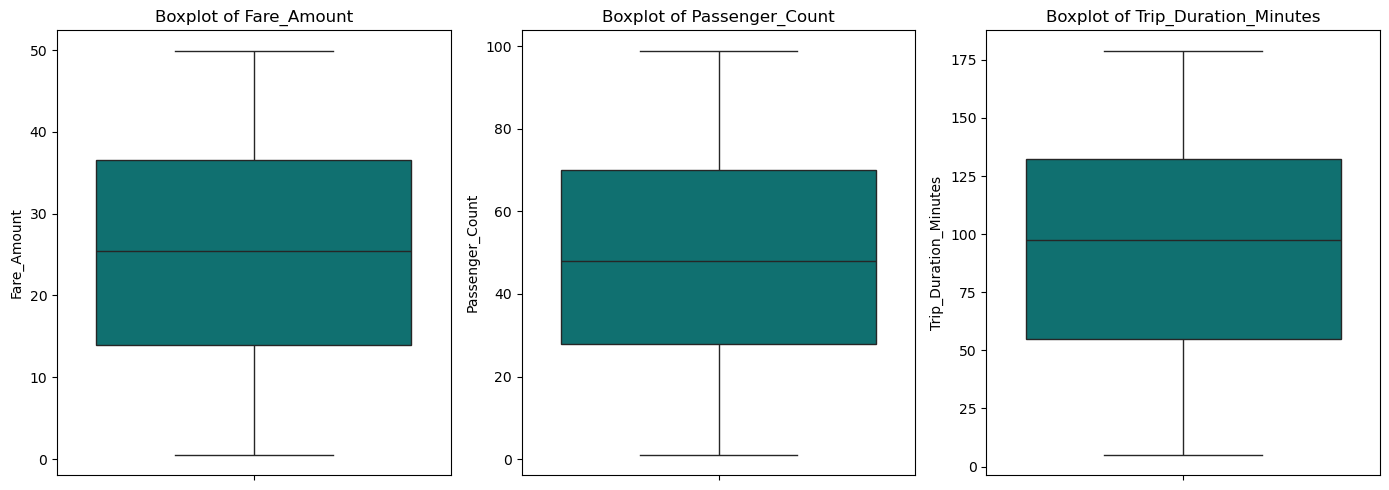

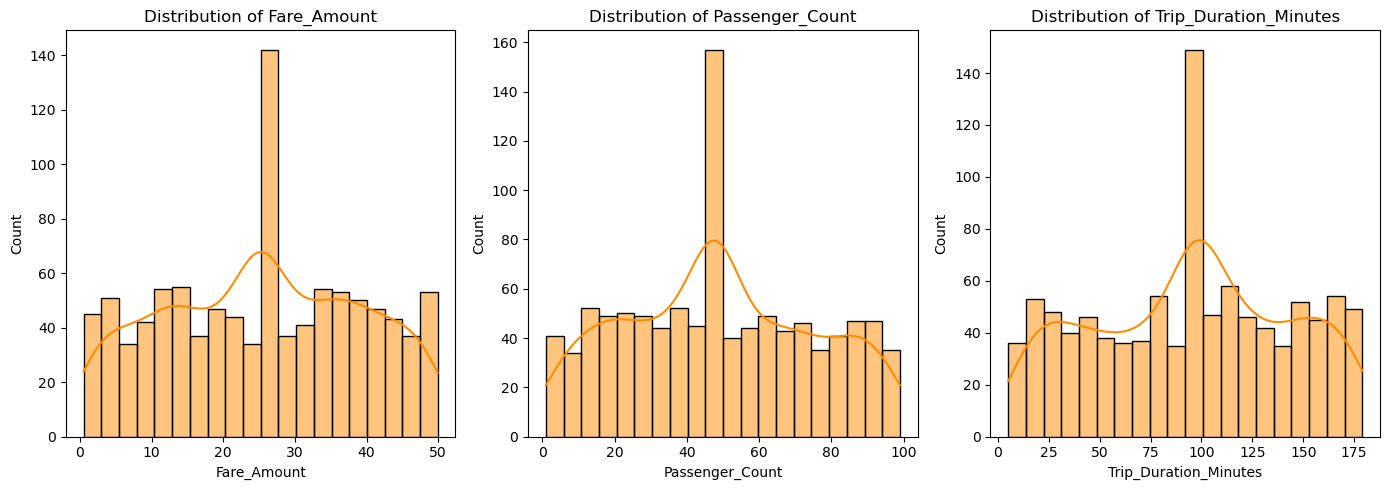

In [37]:
num_vars = ["Fare_Amount", "Passenger_Count", "Trip_Duration_Minutes"]

# 1. Summary Statistics
summary_stats = pd.DataFrame({
    "Mean": data[num_vars].mean(),
    "Median": data[num_vars].median(),
    "Std Dev": data[num_vars].std(),
    "IQR": data[num_vars].quantile(0.75) - data[num_vars].quantile(0.25)
})

print("📊 Descriptive Summary:\n")
print(summary_stats)

# ---------------------------
# 2. Boxplots
# ---------------------------
plt.figure(figsize=(14,5))
for i, col in enumerate(num_vars, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=data[col], color="teal")
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

# ---------------------------
# 3. Histograms
# ---------------------------
plt.figure(figsize=(14,5))
for i, col in enumerate(num_vars, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data[col], kde=True, color="darkorange", bins=20)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

***Insight:*** 

1. Fare Amount

Mean: 25.37 | Median: 25.40 | Std: 13.72 | IQR: 22.66
Suummary: Fares are fairly consistent with slight variability, reflecting differences in trip distance or service type.

Passenger Count

Mean: 49.04 | Std: 26.28
Suummary: Passenger numbers vary widely, some trips are near full capacity, while others have far fewer riders. This indicates uneven demand patterns.


Trip Duration (Minutes)

Mean: 94.59 | Median: 97.5 | Std: 48.04 | IQR: 77.25
Suummary: Average trips take ~95 minutes, but duration varies greatly depending on route and traffic, suggesting areas for efficiency improvement.


# Univariate Descriptive Statistical Analysis of Categorical Variables

In [38]:
categorica_columns = data.select_dtypes(include="object")

In [39]:
categorica_columns.head(3)

,Mode_of_Transport,Departure_Station,Arrival_Station,Day_of_Week,month_name
0,Ferry,West End,Airport,Sunday,January
1,Tram,North Station,Downtown,Saturday,January
2,Bus,Central,North Station,Tuesday,January


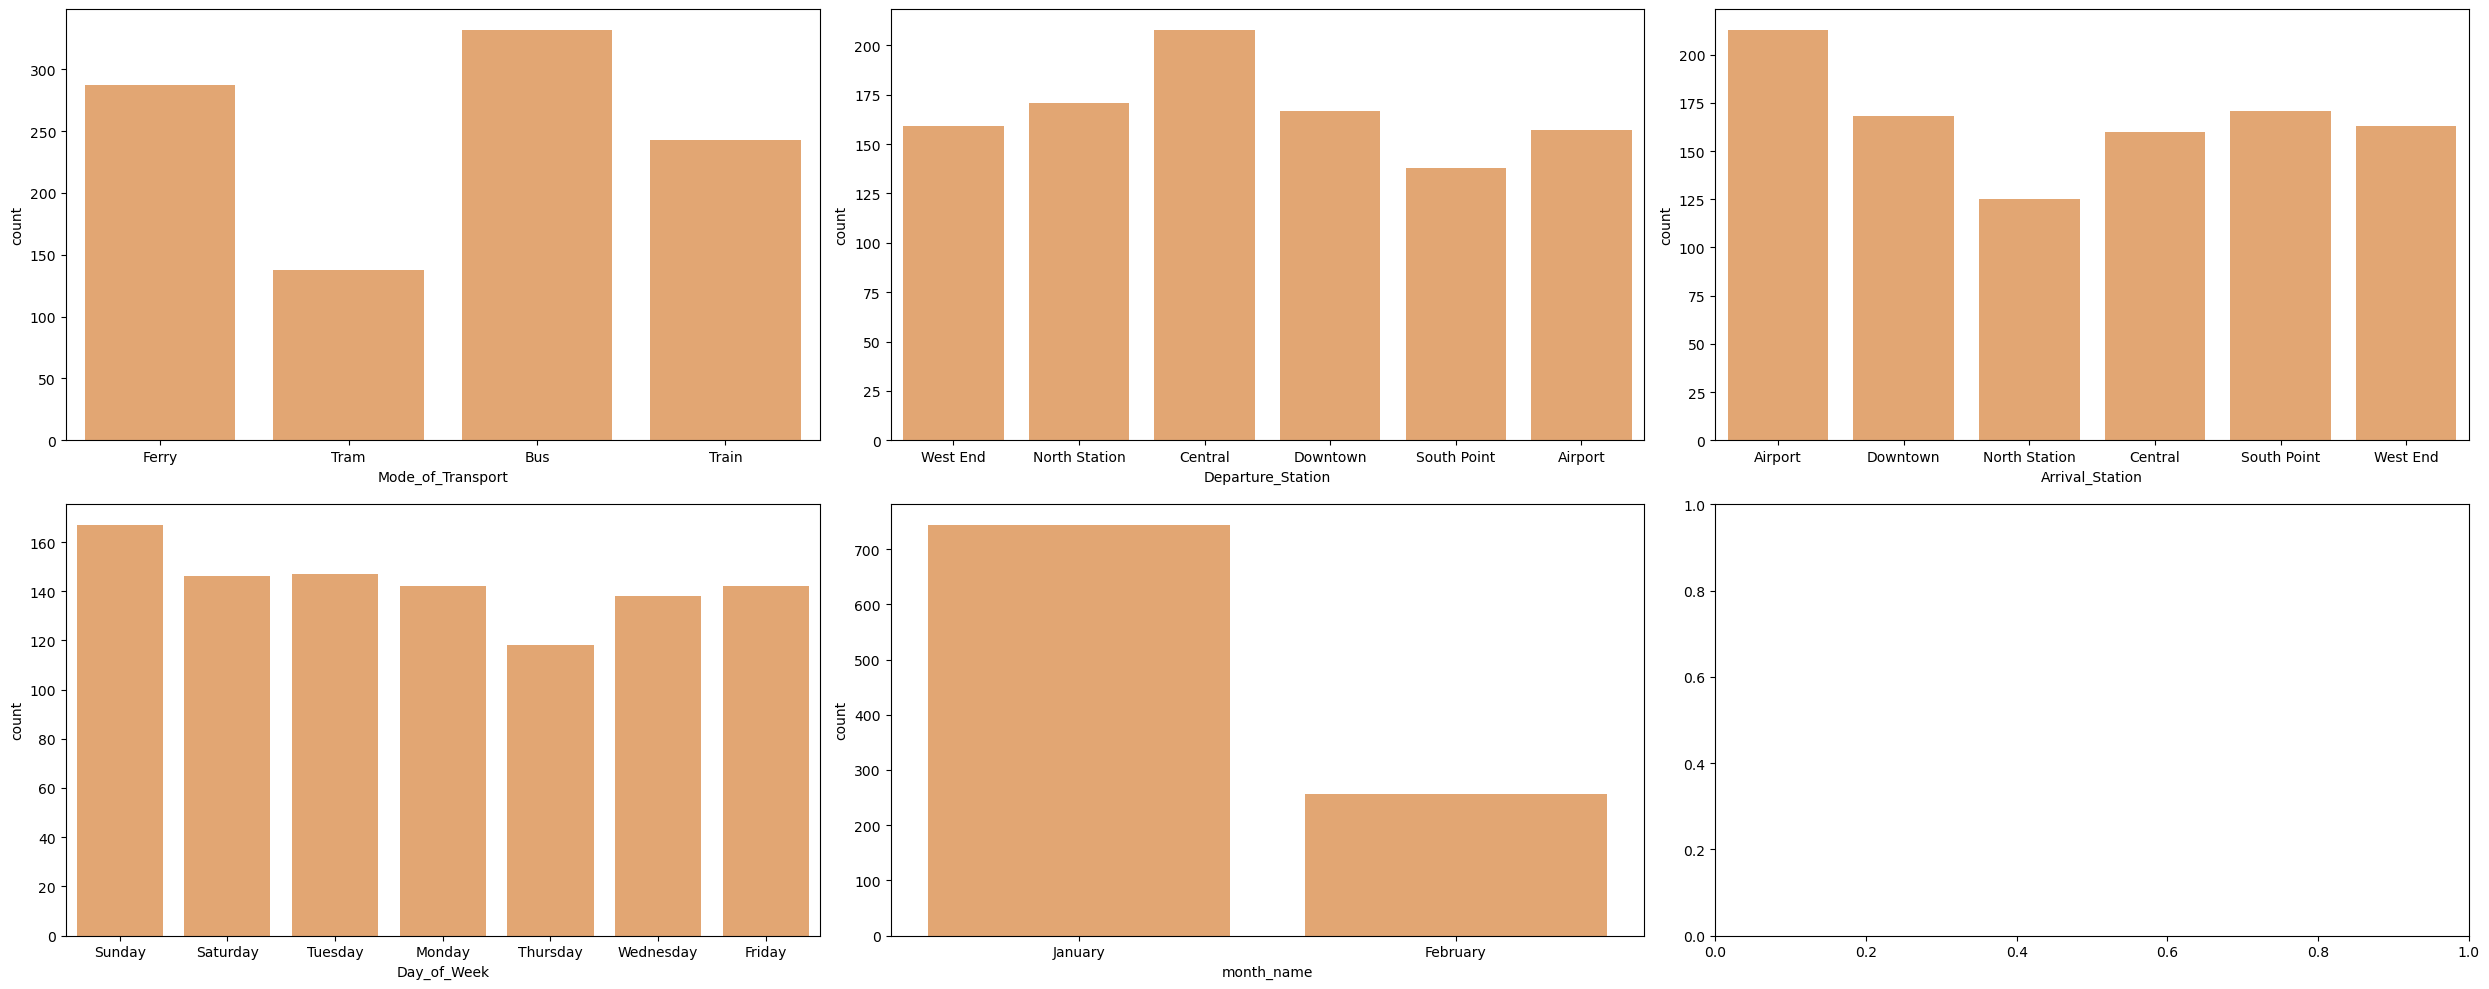

In [40]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(25,10))
ax=ax.flatten()

for index, column_name in enumerate(categorica_columns):
    sns.countplot(x=data[column_name], color="sandybrown", ax=ax[index])
   
plt.tight_layout()
plt.show()

***Insight:*** Bus has the most trips followed by Ferry, while Tram has the lowest trips.  

***Insight:*** More trips started from Central indicating it may be major hub i.e most common departure point, followed by North Station and Downtown. Less from South Point, possibly serving a smaller areas or fewer route. 

***Insight:*** More trips arrived at Airport, suggesting it's a key destination as more people are going for holiday. North_Station is the least common, which may reflect its role more as departure hub than a destination. 

***Insight:*** Most trips happened on a Sunday and fewer trips on a Thursday. 

***Insight:*** Most trips happened in January due to peak holiday period but fewer in February.

In [41]:
# Trips made by month

In [42]:
data["month_name"].value_counts()

month_name
January     744
February    256
Name: count, dtype: int64

***Insight:*** 

Most trips of 744 made in January while 256 trips made in February

In [43]:
from collections import Counter # For counting

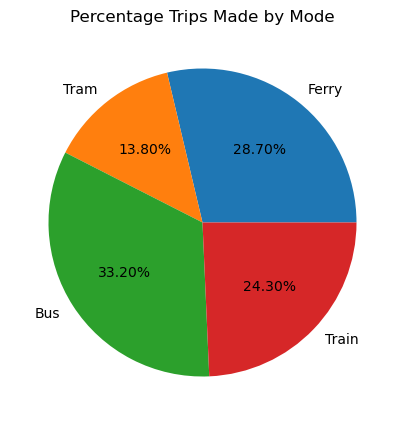

In [44]:
# Percentage of Trips made by each mode of trransport
fig,ax = plt.subplots(figsize=(5,5))
count = Counter(data["Mode_of_Transport"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
plt.title("Percentage Trips Made by Mode")
plt.show()

***Insight:***
Bus made 33.20% trips, Ferry 28.70%, Train 24.30%, and Tram made 13.80% trips

In [45]:
# Use Mode to further confirm Countplot analysis

In [46]:
data["Departure_Station"].mode()

0    Central
Name: Departure_Station, dtype: object

In [47]:
data["Arrival_Station"].mode()

0    Airport
Name: Arrival_Station, dtype: object

In [48]:
data["Mode_of_Transport"].mode()

0    Bus
Name: Mode_of_Transport, dtype: object

In [49]:
data["Day_of_Week"].mode()

0    Sunday
Name: Day_of_Week, dtype: object

***Insight:***
Central  has the most mode
Airport  has the most mode
Bus has the most mode
Sunday has the most mode


## Bivariate Analysis

Numerical vs Numerical:

Numerical vs Categorical:

Categorical vs Categorical:

### Correlation Analysis on Numerical Columns

In [50]:
corr_map = numerica_columns.corr()

In [51]:
corr_map

,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,month
Passenger_Count,1.000000,0.013301,0.020764,-0.034285
Fare_Amount,0.013301,1.000000,-0.042761,0.019727
Trip_Duration_Minutes,0.020764,-0.042761,1.000000,-0.005073
month,-0.034285,0.019727,-0.005073,1.000000


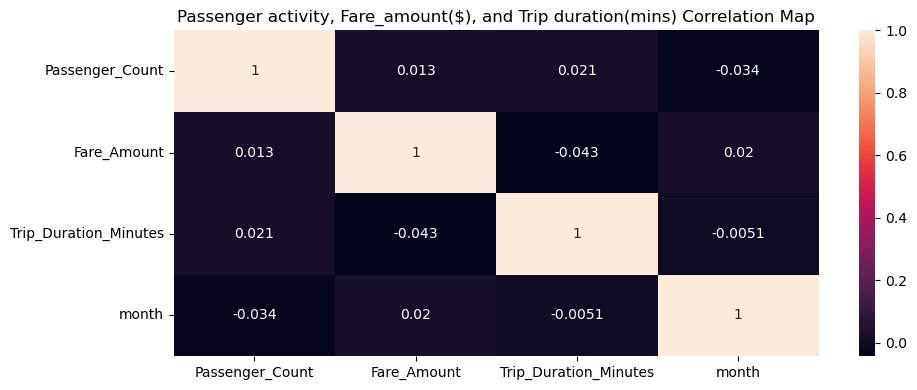

In [52]:
# Heatmap to show correlation between the numerical variables
plt.figure(figsize=(10,4))

sns.heatmap(corr_map, annot=True)
plt.title("Passenger activity, Fare_amount($), and Trip duration(mins) Correlation Map")
plt.tight_layout()
plt.show()

***Insight:*** Passenger_Count and Fare_Amount (USD) have a weak positive correlation i.e The number of passengers does not strongly influence the fare charged. Whether there are more or fewer passengers, fares stay nearly the same, indicating fare price may depend on the mode of transport use.

***Insight:*** Passenger_Count has a weak positive correlation to Trip_Duration_Minute i.e The number of passengers isn’t tied to how long the trips last. Longer or shorter trips don’t seem to depend on passenger volume, suggesting the mode of transport and traffic congestions may interfere.

***Insight:*** Fare_Amount (USD) and Month have a weak positive correlation i.e The fare doesn’t vary much across months; seasonal/monthly effects are minimal.

***Insight:*** Passenger count, fare amount, and trip duration show only very weak positive correlations with one another. This suggests that fare pricing, trip length, and monthly trends are largely independent of passenger volume and do not strongly influence each other.

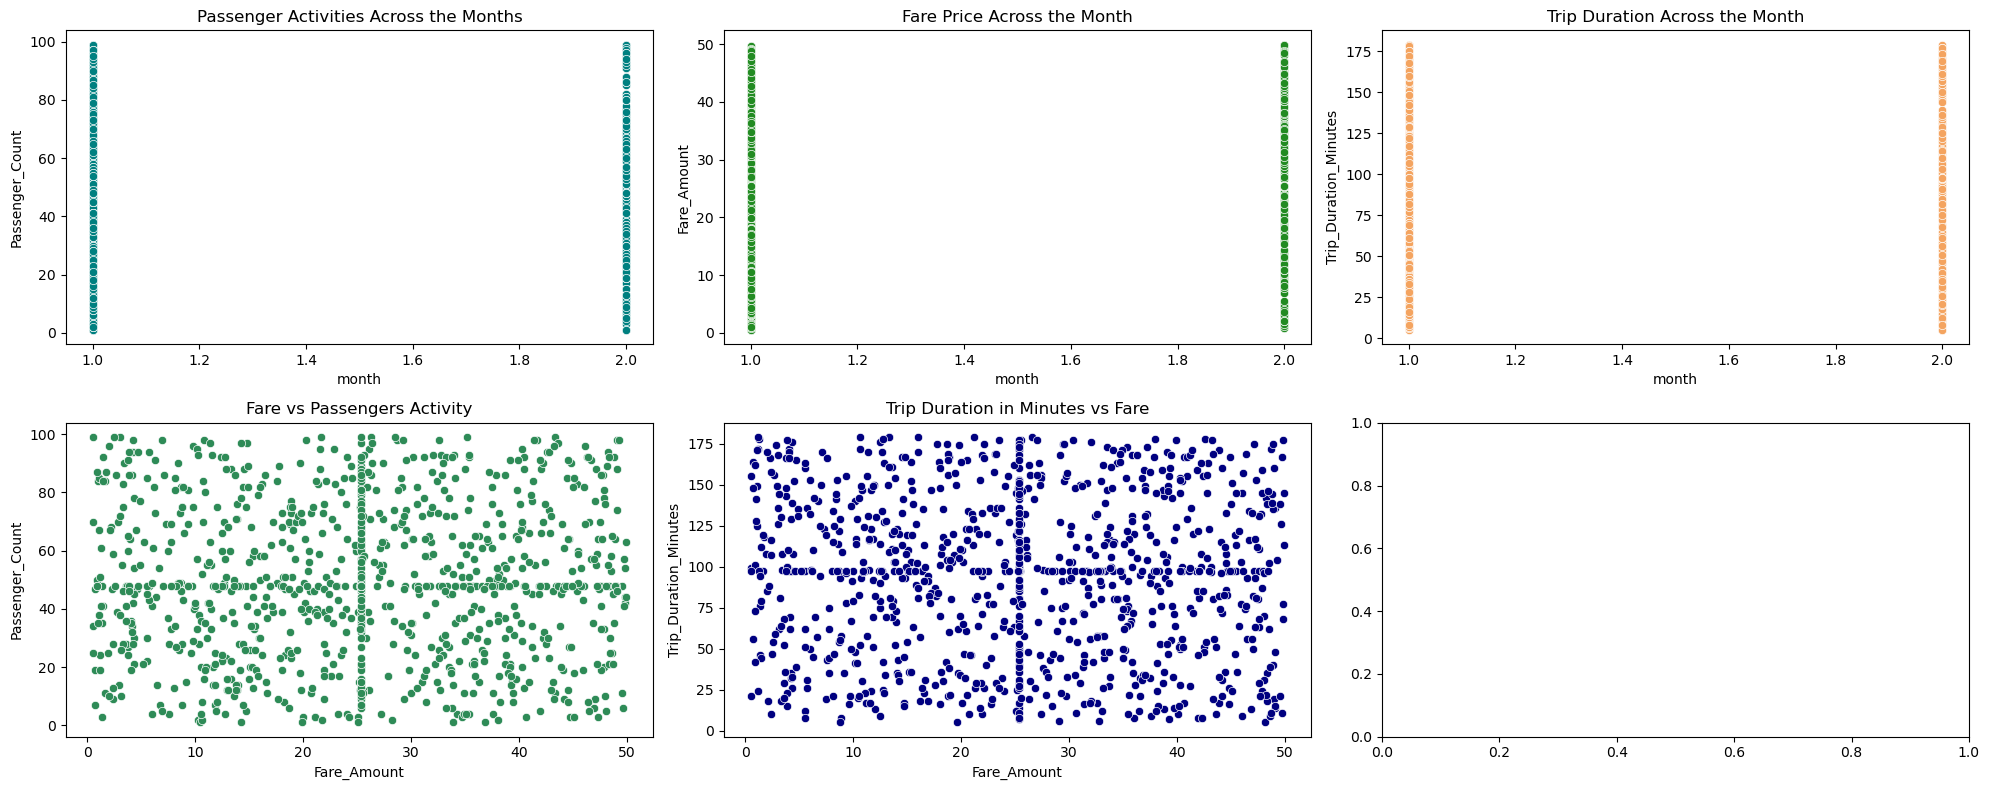

In [53]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20,8))
ax=ax.flatten()

sns.scatterplot(x="month", y="Passenger_Count", data=data, ax=ax[0], color="teal")
ax[0].set_title("Passenger Activities Across the Months")

sns.scatterplot(x="month", y="Fare_Amount", data=data, ax=ax[1], color="forestgreen")
ax[1].set_title("Fare Price Across the Month")

sns.scatterplot(x="month", y="Trip_Duration_Minutes", data=data, ax=ax[2], color="sandybrown")
ax[2].set_title("Trip Duration Across the Month")

sns.scatterplot(x="Fare_Amount", y="Passenger_Count", data=data, ax=ax[3], color="seagreen")
ax[3].set_title("Fare vs Passengers Activity")

sns.scatterplot(x="Fare_Amount", y="Trip_Duration_Minutes", data=data, ax=ax[4], color="navy")
ax[4].set_title("Trip Duration in Minutes vs Fare")

plt.tight_layout()
plt.show()

***Insight:*** Trips in both months had a wide variety of passenger numbers, so passenger count distribution is fairly consistent across months — no clear shift between January (1) and February (2).

***Insight:*** Fares didn’t significantly change between January and February, both months show very similar fare patterns.

***Insight:*** Both months have a similar spread of trip durations, meaning trip length was not tied to the month.

***Insight:*** No clear correlation between fare and passenger count, or fare and trip duration — fare does not strongly increase with either.

***Insight:*** Flat-rate pricing detected → Many fares cluster around 20–25, suggesting standardised pricing rather than dynamic pricing based on passengers or duration.

***Insight:*** Passenger activity → Wide variation in passenger counts (0–100), but fares remain stable.

***Insight:*** Trip duration → Trips last anywhere from a few minutes up to 175 minutes, but fare remains fairly consistent, reinforcing fares depend more on other factors (e.g., fixed pricing rules, routes, or service types).

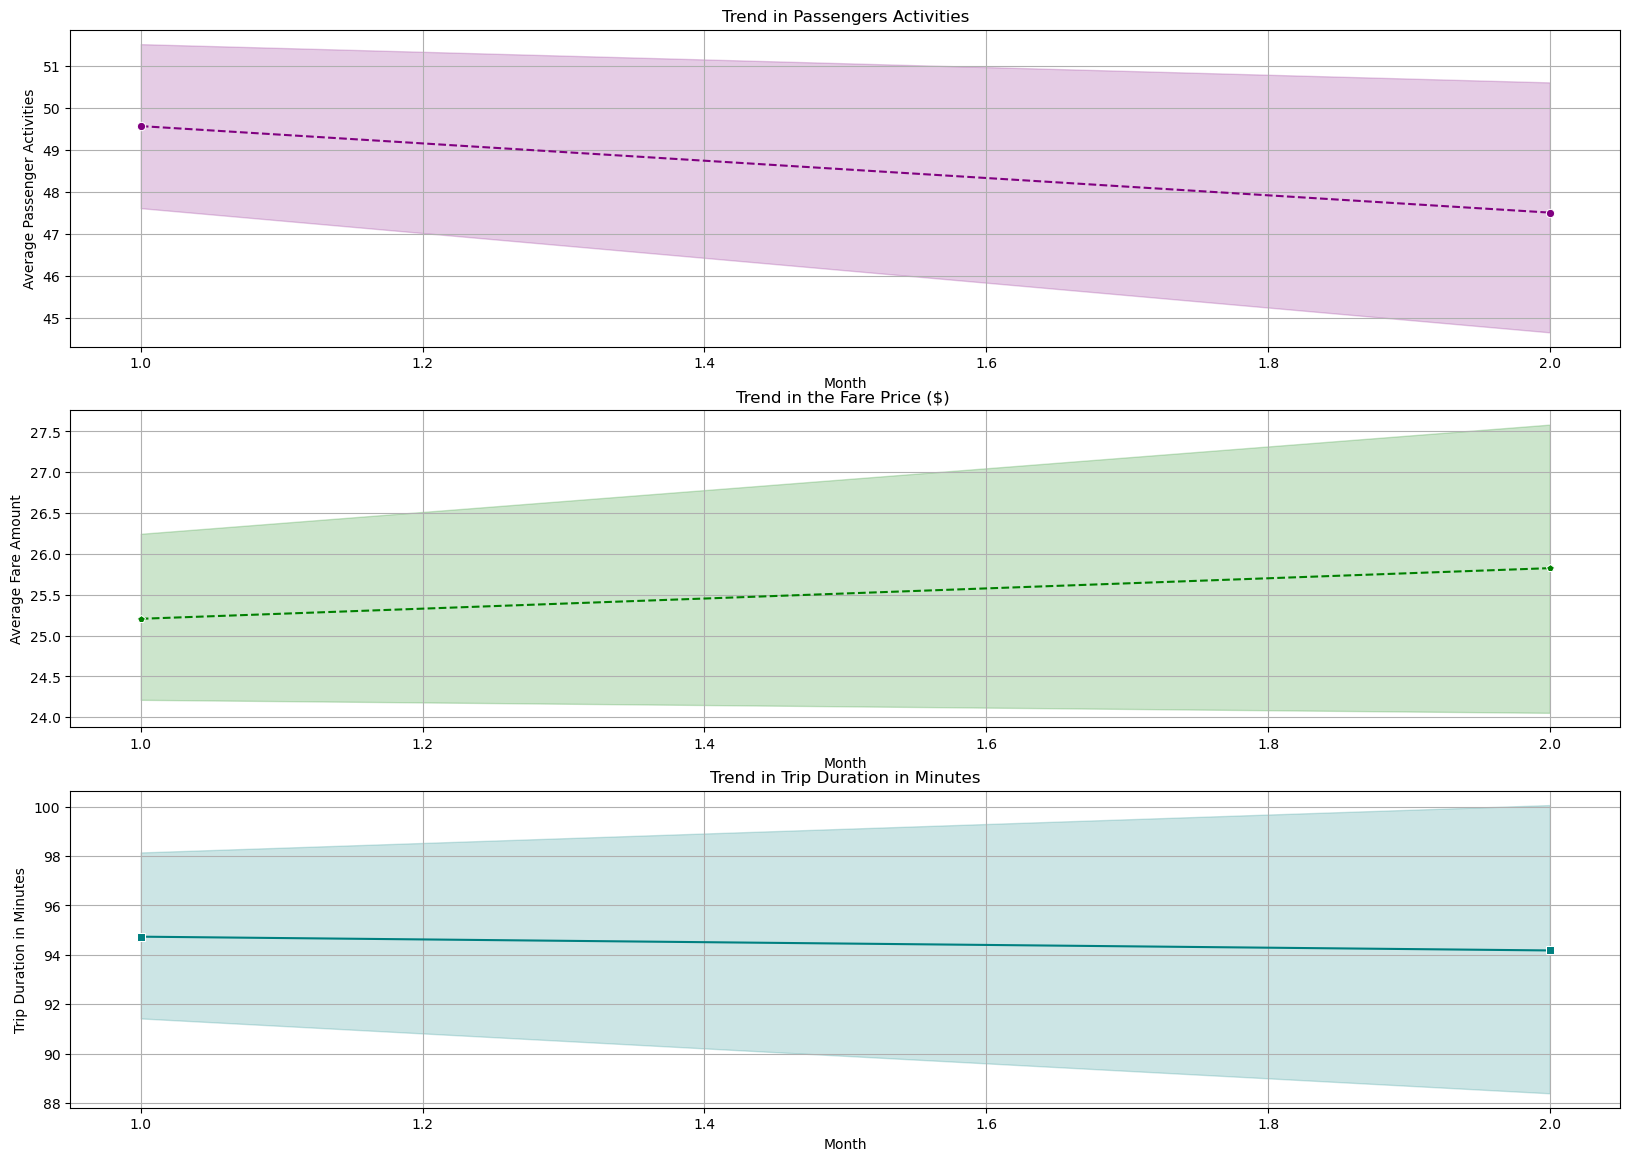

In [54]:
fig, ax = plt.subplots(nrows=3, figsize=(20,14))

sns.lineplot(x="month", y="Passenger_Count", data=data, ax=ax[0], color="purple", marker="o", linestyle="--")
ax[0].set_title("Trend in Passengers Activities")
ax[0].set_xlabel("Month")
ax[0].set_ylabel("Average Passenger Activities")
ax[0].grid(True)

sns.lineplot(x="month", y="Fare_Amount", data=data, ax=ax[1], color="green", marker="p", linestyle="--")
ax[1].set_title("Trend in the Fare Price ($) ")
ax[1].set_xlabel("Month")
ax[1].set_ylabel("Average Fare Amount")
ax[1].grid(True)

sns.lineplot(x="month", y="Trip_Duration_Minutes", data=data, ax=ax[2], color="teal", marker="s")
ax[2].set_title("Trend in Trip Duration in Minutes")
ax[2].set_xlabel("Month")
ax[2].set_ylabel("Trip Duration in Minutes")
ax[2].grid(True)

plt.tight_layout
plt.show()       

***Insight:*** Overall passenger activity, average fare, and trip duration remain stable. January shows a very small increase in passenger count (+2), February records a minor fare rise (+$0.25), and trip duration decreases slightly (-1 minute). These changes are minimal and do not indicate a meaningful trend.

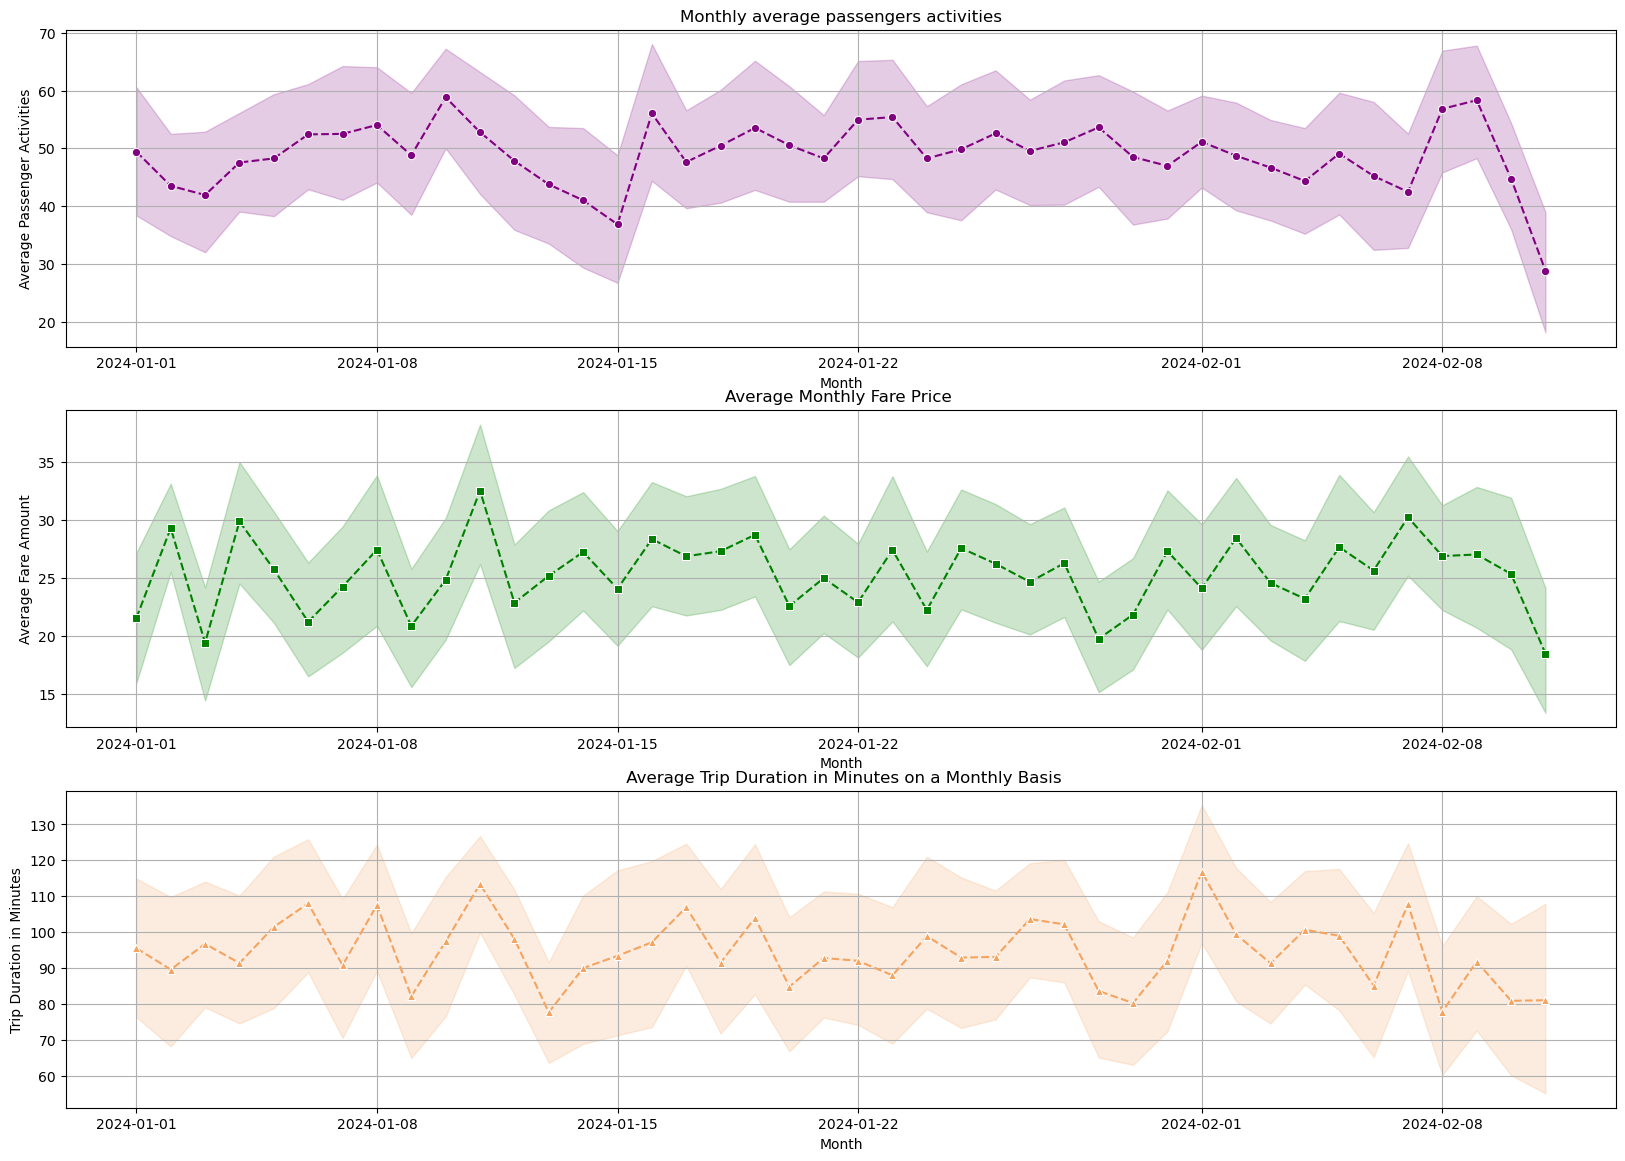

In [55]:
fig, ax = plt.subplots(nrows=3, figsize=(20,14))

sns.lineplot(x="Trip_Date", y="Passenger_Count", data=data, ax=ax[0], color="purple", marker="o", linestyle="--")
ax[0].set_title("Monthly average passengers activities")
ax[0].set_xlabel("Month")
ax[0].set_ylabel("Average Passenger Activities")
ax[0].grid(True)

sns.lineplot(x="Trip_Date", y="Fare_Amount", data=data, ax=ax[1], color="green", marker="s", linestyle="--")
ax[1].set_title("Average Monthly Fare Price ")
ax[1].set_xlabel("Month")
ax[1].set_ylabel("Average Fare Amount")
ax[1].grid(True)

sns.lineplot(x="Trip_Date", y="Trip_Duration_Minutes", data=data, ax=ax[2], color="sandybrown", marker="^", linestyle="--")
ax[2].set_title(" Average Trip Duration in Minutes on a Monthly Basis")
ax[2].set_xlabel("Month")
ax[2].set_ylabel("Trip Duration in Minutes")
ax[2].grid(True)

plt.tight_layout
plt.show()  

***Insight:*** 
10-01-2024 has the slight highest pasenger activities while 11.02.2024 has the lowest
11-01-2024 has the slight highest average fare amount while 11.02.2024 has the lowest
01-02-2024 has the slight highest trip duration in minutes while 11.02.2024 has the lowest
Again this trend indicate no direct effect of fare amount and passenger count on trip duration in minutes

In [56]:
## Descriptive Statistical Analysis of Categorical Variables

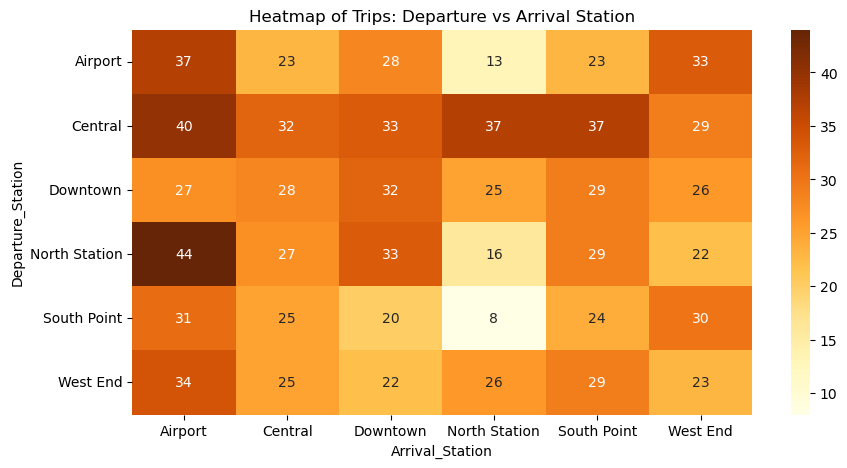

In [57]:
# Cross-tab between Departure and Arrival (counts of trips)
station_arr = pd.crosstab(data["Departure_Station"], data["Arrival_Station"])

# Plot heatmap
plt.figure(figsize=(10,5))
sns.heatmap(station_arr, annot=True, fmt="d", cmap="YlOrBr")
plt.title("Heatmap of Trips: Departure vs Arrival Station")
plt.show()



***Insight:*** North Station → Airport (44 trips)
North Station is a major departure hub for Airport trips, suggesting a strong commuting.

Central → North Station & Central → South Point (37 trips each)
Central is a busy staring point where a lot of people begin their journeys. From there passengers travel to different places

Many Trip start and end at the Airport, Indicates Airport is a key bi-directional hub (people coming in and going out)

South Point → North Station (only 8 trips)
This suggest not many people travel between South Point and North station, so not closely connected in terms of passenger movement.

West End flows has moderate connections across all stations (values mostly 22–34).
It plays more of a secondary hub role i.e alternative hub, not extreme highs or lows activity.

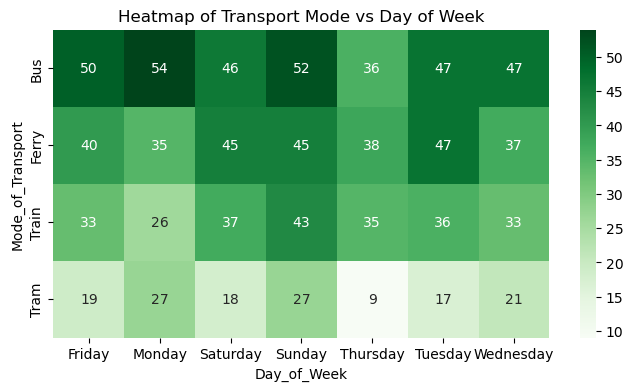

In [58]:
mode_day = pd.crosstab(data["Mode_of_Transport"], data["Day_of_Week"])

plt.figure(figsize=(8,4))
sns.heatmap(mode_day, annot=True, fmt="d", cmap="Greens")
plt.title("Heatmap of Transport Mode vs Day of Week")
plt.show()

***Insight:*** Bus trips happened most on a Monday, suggest trying to get more passenger to work

Train has moderate trips activity across the week (values mostly 26–43), indicate it's an alternative mode of transport for passengers.

Tram has the lowest trips on Thursday (9 trips) and across the week, probably due to dedication for short journey within urban

Monday recorded the lowest trips count for Train and Ferry

Thursday recorded the lowest trips count Bus and Tram  

## Bivariate analysis of Numerical and Categorical Features 

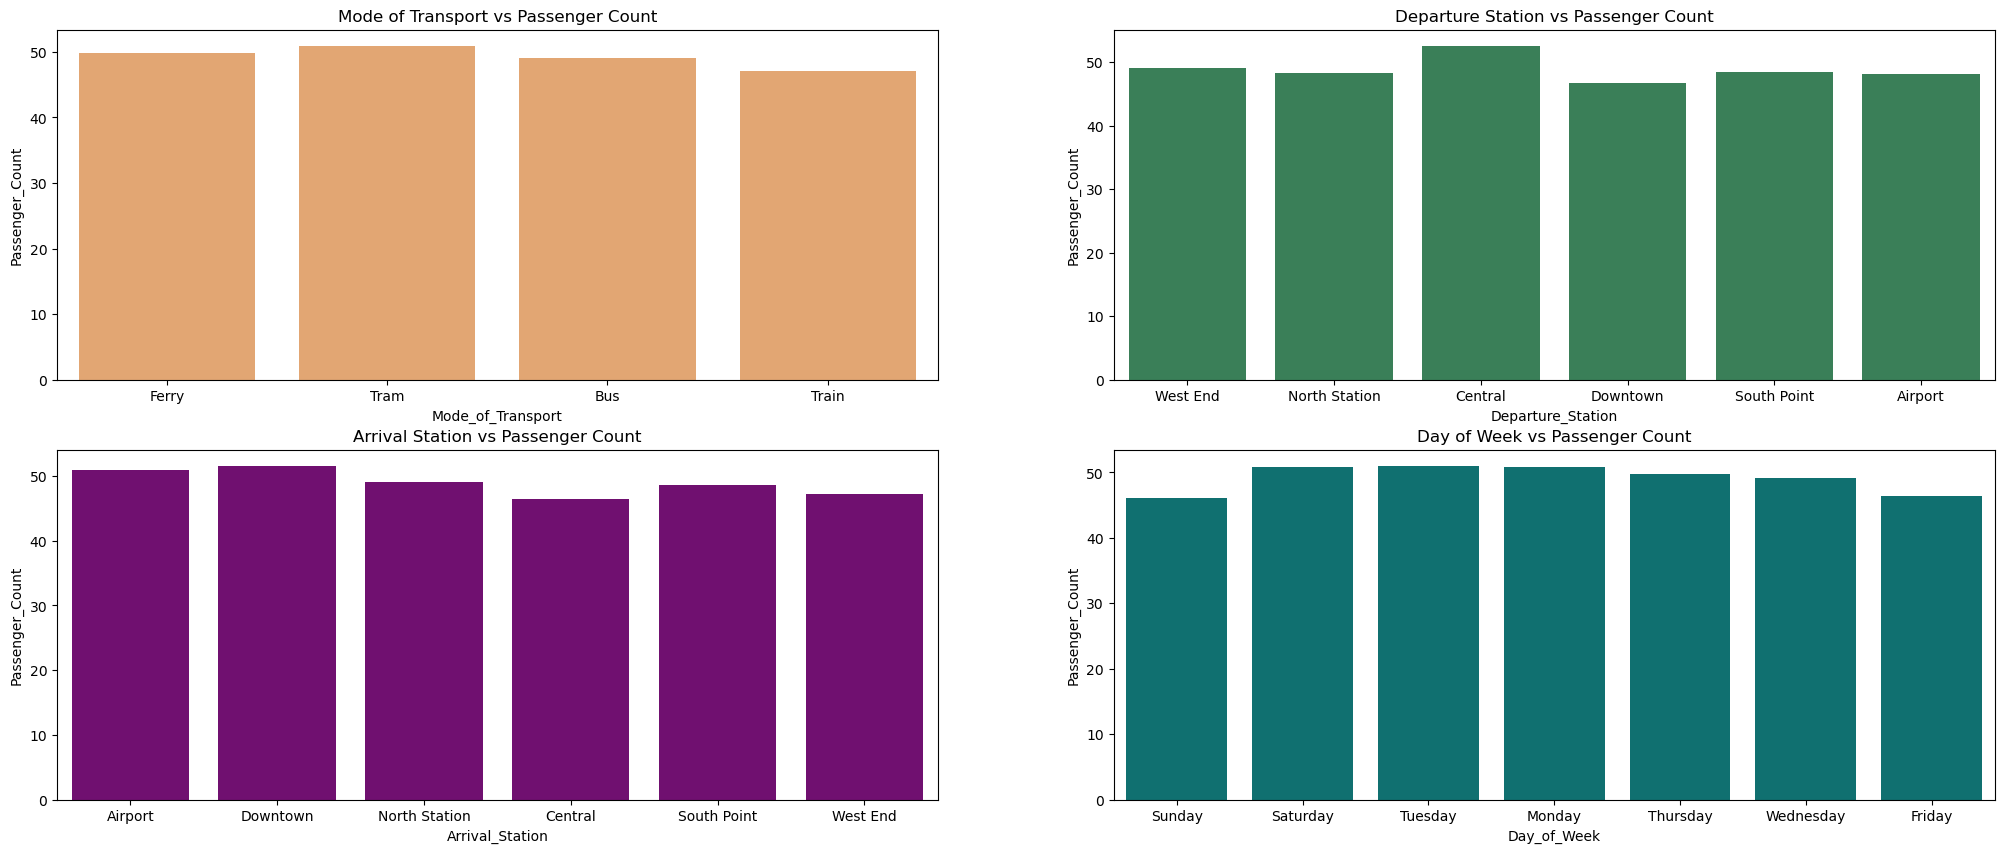

In [59]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,10))
ax=ax.flatten()

sns.barplot(x="Mode_of_Transport", y="Passenger_Count", data=data, color="sandybrown", errorbar=None, ax=ax[0])
ax[0].set_title("Mode of Transport vs Passenger Count")

sns.barplot(x="Departure_Station", y="Passenger_Count", data=data, color="seagreen", errorbar=None, ax=ax[1])
ax[1].set_title("Departure Station vs Passenger Count")

sns.barplot(x="Arrival_Station", y="Passenger_Count", data=data, color="purple", errorbar=None, ax=ax[2])
ax[2].set_title("Arrival Station vs Passenger Count")

sns.barplot(x="Day_of_Week", y="Passenger_Count", data=data, color="teal", errorbar=None, ax=ax[3])
ax[3].set_title("Day of Week vs Passenger Count")

plt.tight_layout
plt.show()

***Insight:*** Transport Mode Usage

More passenger travel on Tram but countplot shows that it made the lowest trips Probably it's coverage. and less passenger activities on Train

***Insight:*** Departure Points

Most passenger depart from Central indicating it's the most common departure point, and fewer people depart from Downtown, indicating it function as arrival hub. .

***Insight:*** Arrival Points

Most passenger arrived at Downtown followed by Airport suggesting they may be a key destination as more people are going for holiday, and fewer people arrived at Central indicating it's functioning mainly as a departure hub 

***Insight:*** Day of Travel
Monday, Tuesday, and Saturday are the busiest days in terms of people travelling, and Sunday is the less busy day in terms of passengers activity.

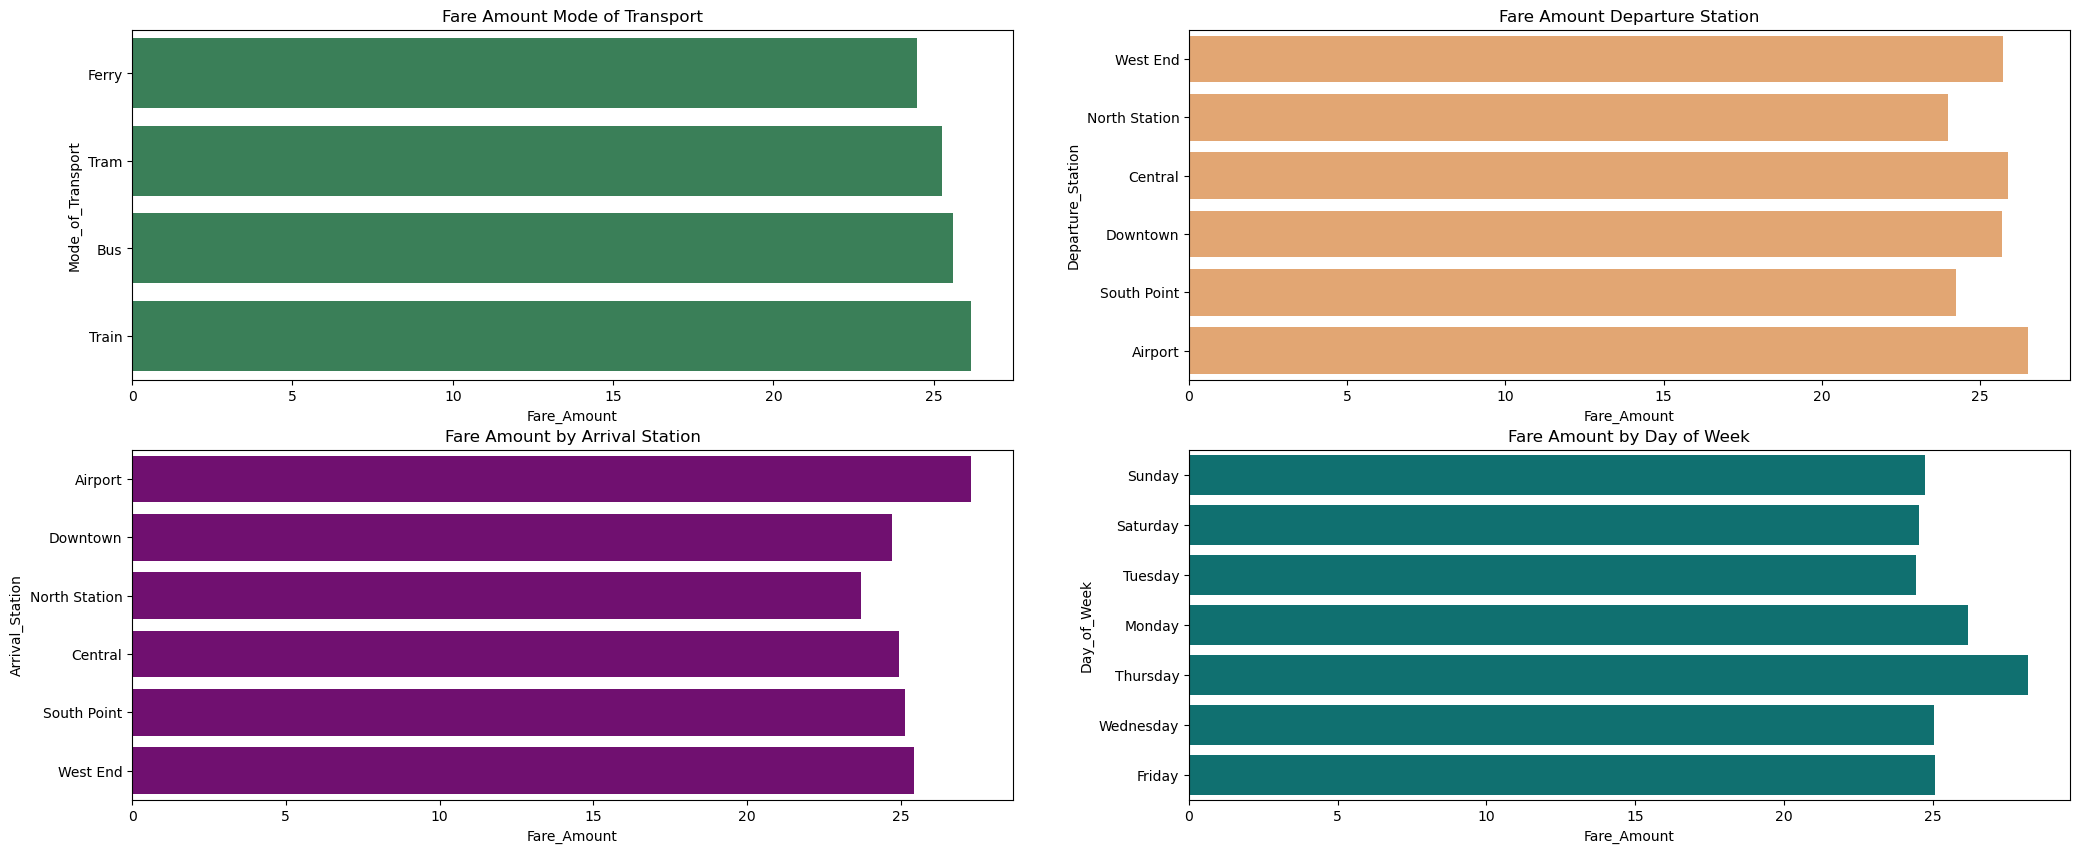

In [60]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,10))
ax=ax.flatten()

sns.barplot(y="Mode_of_Transport", x="Fare_Amount", data=data, color="seagreen", errorbar=None, ax=ax[0])
ax[0].set_title("Fare Amount Mode of Transport", fontsize=12)

sns.barplot(y="Departure_Station", x="Fare_Amount", data=data, color="sandybrown", errorbar=None, ax=ax[1])
ax[1].set_title("Fare Amount Departure Station", fontsize=12)

sns.barplot(y="Arrival_Station", x="Fare_Amount", data=data, color="purple", errorbar=None, ax=ax[2])
ax[2].set_title("Fare Amount by Arrival Station", fontsize=12)

sns.barplot(y="Day_of_Week", x="Fare_Amount", data=data, color="teal", errorbar=None, ax=ax[3])
ax[3].set_title("Fare Amount by Day of Week", fontsize=12)

plt.tight_layout
plt.show()

***Insight:*** Transport Mode Usage

Trips on Train bring in the most money.

***Insight:*** Departure Points

Trips starting at the Airport bring in the most money probably due to longer trips or highest ticket price. And trips from North Station bring in the least money, probably due to quick trip.

***Insight:*** Arrival Points

Trips ending at the Airport bring in the most money probably due to longer trips or highest ticket price. And trips from North Station bring in the least money 

***Insight:*** Day of Travel
Trips on Thursday bring in the most money while Saturday, Sunday, and Tuesday bring in less money.

***In Summary:***
The numbers of trips or passengers doesn't always match fare collected.

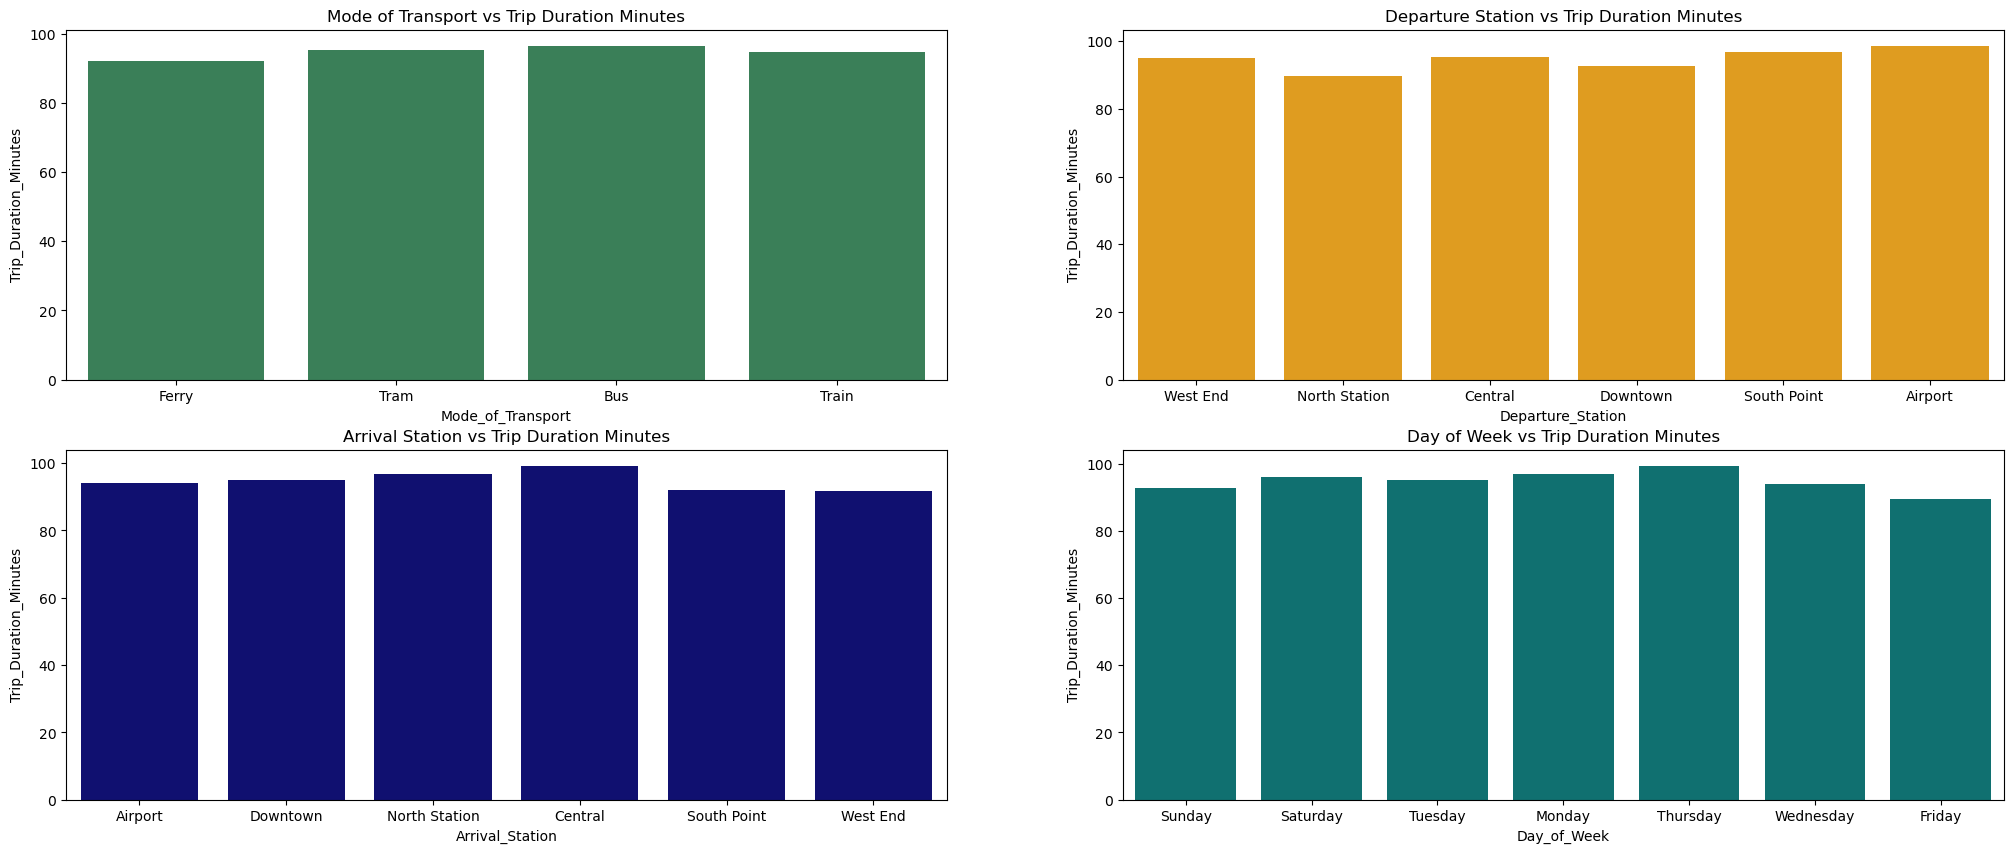

In [61]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,10))
ax=ax.flatten()

sns.barplot(x="Mode_of_Transport", y="Trip_Duration_Minutes", data=data, color="seagreen", errorbar=None, ax=ax[0])
ax[0].set_title("Mode of Transport vs Trip Duration Minutes", fontsize=12)

sns.barplot(x="Departure_Station", y="Trip_Duration_Minutes", data=data, color="orange", errorbar=None, ax=ax[1])
ax[1].set_title("Departure Station vs Trip Duration Minutes", fontsize=12)

sns.barplot(x="Arrival_Station", y="Trip_Duration_Minutes", data=data, color="navy", errorbar=None, ax=ax[2])
ax[2].set_title("Arrival Station vs Trip Duration Minutes", fontsize=12)

sns.barplot(x="Day_of_Week", y="Trip_Duration_Minutes", data=data, color="teal", errorbar=None, ax=ax[3])
ax[3].set_title("Day of Week vs Trip Duration Minutes", fontsize=12)

plt.tight_layout
plt.show()

***Insight:*** Transport Mode Usage

On average bus journeys take the most time and Ferry journey are the quickiest.

***Insight:*** Departure Points

Trips starting from the Airport has the longestest trips while North Station has the shortest trips.

***Insight:*** Arrival Points

Getting to Central takes the most time (longest trip) while reaching South Point is relatively quick (shortest trips) 

***Insight:*** Day of Travel
Thursday has the longest trips and Friday are the quickest.

***In Summary:***
More time is expected when travel by bus than ferry.
Airport trips may go far destinations while North station trips are more local.
Central may be far away or have more traffic delays compared to South Point.
There may be more congestion on Thursdays, and faster Journey on Fridays

# MetroMove Exploratory Data Analysis Insights & Recommendations

### MetroMove Mission

MetroMove aims to provide **efficient, affordable, and timely public transportation**. They want every rider’s journey to be smooth, fair in cost, and reliable in timing.

Through our analysis of trip data, we’ve uncovered important insights into **how passengers travel, how fares work, and how trips perform**. These findings point to opportunities for improvement.


### 1. Passenger Behavior

**Insight:**

* **Central Station** is the main starting point, while **Airport** is the top destination.
* Demand peaks during **holiday months (January)** and is lower in February.
* Some trips run almost full, others with very few passengers demand is uneven.
* Buses carry the most trips, while **trams**, despite fewer trips, carry more people per ride.

**Summary:**
Passengers rely heavily on Central and Airport, making them our busiest hubs. Demand isn’t evenly spread some routes are overused, while others are underutilized.

**Recommendation:**

* Strengthen services and facilities at Central and Airport.
* Promote less-used hubs like **South Point and North Station** to spread demand.
* Adjust schedules to meet **seasonal and weekly peaks** add more trips in January and on busy weekdays.

    

### 2. Fare Patterns

**Insight:**

* Fares are **flat and predictable** at around $25, no matter how far or how long the trip.
* Airport trips generate **the most revenue**, while North Station trips generate the least.
* Fare revenue does not increase with passenger numbers or trip length.

**Summary:**
Our pricing model isn’t tied to distance or time. This makes short trips and long trips cost about the same, which may not be fair or optimal for revenue.

**Recommendation:**

* Keep base fares affordable, but introduce **distance or time-based pricing** for fairness.
* Offer **premium airport services** (e.g., express buses, luggage-friendly rides) at a slightly higher price.
* Encourage ridership during **low-demand days** with discounts or travel passes.



### 3. Trip Performance

**Insight:**

* Trips last about **95–100 minutes on average**, but some are much shorter or longer.
* Buses are the slowest mode; ferries are the fastest.
* Airport departures take the longest, while North Station trips are the shortest.
* Travel times are longest on **Thursdays** and quickest on **Fridays**.

**Summary:**
Journey times are inconsistent, with congestion and route design affecting reliability. Passengers may experience delays, especially on bus routes and on certain days.

**Recommendation:**

* Reduce delays by **prioritising buses** with dedicated lanes and signals.
* Launch **express routes** between key hubs (like Airport ↔ Central).
* Use **traffic patterns** (e.g., Thursdays are slower) to plan smarter schedules.



### 4. Overall Efficiency

**Insight:**

* Passenger numbers, fares, and trip times are not strongly connected meaning our system isn’t optimised.
* High-demand flows (Central ↔ Airport, North Station ↔ Airport) drive most activity.
* Some routes carry passengers but generate very little revenue like Central.

**Summary:**
We’re not fully matching supply (buses, trains) to demand. Some busy areas need more attention, while underused routes may need rethinking.

**Recommendation:**

* Allocate more buses and trains where demand is strongest.
* Redesign or consolidate underperforming routes.
* Use **real-time data monitoring** to adjust services, pricing, and scheduling as needed.



## ✅ Strategic Action for MetroMove

By focusing on **busiest hubs**, adjusting **pricing to match fairness and revenue goals**, reducing **trip delays**, and using **data-driven planning**, MetroMove can deliver on its promise of:

* **Efficiency** – less congestion, better route design.
* **Affordability** – fairer pricing for riders.
* **Timeliness** – more reliable journeys.
* **Better passenger experience** – smoother, easier travel across the network.
